# Heart Disease Identification - Multiclass Classification and UMAP

This project aims at analysising provided patients health attributes for further identification of heart disease. In this way, not only the presence of heart disease is studied but also the type of the disease, having four different possible disease categories. For that end, a database containing fourteen charasteritic features for each patient, including the actual diagnosis results, is used for training a series of selected prediction algorithms. Hence, different classification models are tested and assessed based on the principles of supervised learning. Furthermore, analysis of the data structure and assessment of its multiclass nature is performed by UMAP method. Finally, the predictive performance of the models is evaluated considering both binary (predict if disease exists) and multiclass clasification (predict the type of disease).

<img src="./heart.jpg" width=800 height=300 />

## Table of Contents

* [1. Data exploration](#chapter1)
    * [1.1. Preliminary data overview](#section_1_1)
    * [1.2. Data types and invalid values](#section_1_2)
    * [1.3. Train and test Data](#section_1_3)
    * [1.4. Data visalization](#section_1_4)
    * [1.5. Attributes on heart disease](#section_1_5)
        * [1.5.1. Binary target - Presence of Heart Disease](#section_1_5_1)
        * [1.5.1. Multiclass target - Type of Heart Disease](#section_1_5_2)
* [2. Data pre-processing](#chapter2) 
    * [2.1. Preliminary data overview](#section_2_1)
    * [2.2. Data types and invalid values](#section_2_2)
* [3. UMAP: Uniform Manifold Approximation and Projection](#chapter3)        
* [4. Classification Models](#chapter4)
    * [4.1. Binary Classification](#section_4_1)
        * [4.1.1. K-Neighbors](#section_4_1_1)
        * [4.1.2. Decision Tree](#section_4_1_2)
        * [4.1.3. Random Forest](#section_4_1_3)
        * [4.1.4. Logistic Regression](#section_4_1_4)
        * [4.1.5. Support Vector Machines](#section_4_1_5)
        * [4.1.6. Neural Network](#section_4_1_6)
    * [4.2. Multiclass Classitication](#section_4_2)
        * [4.1.1. K-Neighbors](#section_4_1_1)
        * [4.1.2. Decision Tree](#section_4_1_2)
        * [4.1.3. Random Forest](#section_4_1_3)
        * [4.1.4. Logistic Regression](#section_4_1_4)
        * [4.1.5. Support Vector Machines](#section_4_1_5)
        * [4.1.6. Neural Network](#section_4_1_6)
* [5. Conclusion](#chapter4)

# 1. Data Exploration <a class="anchor" id="chapter1"></a>

We fist load the necessary packages:

In [423]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, learning_curve, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import umap

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

## 1.1. Preliminary data overview  <a class="anchor" id="section_1_1"></a>

Let's now fetch the data! In this case, the datafile does not contain the feature names, so we need to add them manually:

In [424]:
data_path = os.getcwd()
data_file = 'processed.cleveland.data'

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv(data_path + '/' + data_file,  sep= ",", names = features, header = 0)

For a better understanding of features contained in the datafile, here is a summary of their meaning:

1. age: age in years
2. sex: sex of the patient (1 = male; 0 = female) 
3. cp: chest pain type 
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - 1: upsloping
    - 2: flat
    - 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: diagnosis of heart disease (angiographic disease status) 

Let's now take look at our dataset:

In [425]:
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   slope   ca thal  target  
0    2.0  3.0  3.0       2  
1    2.0  2.0  7.0       1  
2    3.0  0.0  3.0       0  
3    1.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [427]:
print(f'There are {data.shape[0]} patients with {data.shape[1]} features')

There are 302 patients with 14 features


We also look at our target attribute. As we can see, there are 4 possible categories with a clear imbalanced representation. As previously mentioned, value 0 corresponds to healthy patients whereas positive heart disease is categorised based on the four remaining values from 1 to 4:

In [428]:
data.loc[:,'target'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: target, dtype: int64

### 1.2. Data types and invalid values <a class="anchor" id="section_1_2"></a>

We now make sure there are neither missing values nor duplicated data:

In [429]:
data.duplicated().any()

False

In [430]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Nonetheless, when doing data exploration, we noticed some values of 'thal' and 'cal' which are no valid:

In [431]:
data[data.thal == '?']

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
86   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
265  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   

     slope   ca thal  target  
86     1.0  0.0    ?       0  
265    2.0  0.0    ?       2

In [432]:
data[data.ca == '?']

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
165  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
191  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope ca thal  target  
165    1.0  ?  3.0       0  
191    2.0  ?  7.0       1  
286    2.0  ?  7.0       0  
301    1.0  ?  3.0       0

Considering there are only a few rows affected, we can just remove them without losing too much information:

In [433]:
data.drop(data[data.thal == '?'].index, inplace=True)
data.drop(data[data.ca == '?'].index, inplace=True)

data.reset_index(drop=True,inplace=True)

We make sure there are no invalid values left:

In [434]:
data.eq('?').any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Last but not least, we check the type of each feature:

In [435]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

As observed, features 'ca' and 'thal' are considered object types. Let's now define them as numerical:

In [436]:
data[['ca','thal']] = data[['ca','thal']].astype('float64')

## 1.3.  Train and test data <a class="anchor" id="section_1_3"></a>

Let's now split the dataset by saving the features and target values separately:

In [437]:
y = data.target
X = data.drop(['target'], axis=1)

We do the same only considering samples with positive diagnosis (target: 1, 2, 3 and 4). This will be useful for later analysis.

In [438]:
data_positive = data[data.target != 0]
y_pos = data_positive.target
X_pos = data_positive.drop(['target'], axis=1)

As previously explained, target values above zero correspond to different levels of positive heart disease, whereas zero values correspond to healthy patients. Taking this into account, we can make a binary distinction considering if a heart disease is present or not (0: 0 healthy patients, 1: 1-4 existing heart disease). Based on this, we generate new series containing binary target values:

In [439]:
dict_binary = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y_binary = pd.Series(list(map(lambda x: dict_binary[x], y)), name= y.name, index= y.index)

We now further split the data into training and test datasets. The training data will be used by the model to learn and refine its performance when making predictions. The test data however, will not be part of the training process and thus, it will guarantee to assess the actual performance of the model when applied to unseen features. In this case, we set the training data to be 80% of the input dataset and the remaining 20% to be the test data. Furthermore, we stratify according to the target classes in order to keep the same distribution of categories.

In [440]:
data_train, data_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.8, test_size=0.2, random_state=0)

In [441]:
data_train_pos, data_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, stratify=y_pos, train_size=0.8, test_size=0.2, random_state=0)

We do the same with out binary series:

In [442]:
y_train_binary = y_binary.iloc[y_train.index]
y_test_binary = y_binary.iloc[y_test.index]

Once we have our training data defined, we check the amount of unique values that each feature can adopt, and their type:

In [443]:
df_type_num = pd.DataFrame(data=zip(data_train.dtypes,data.nunique()), columns=['Type', 'Unique'], index = data_train.columns)
df_type_num

Type  Unique
age       float64      41
sex       float64       2
cp        float64       4
trestbps  float64      50
chol      float64     152
fbs       float64       2
restecg   float64       3
thalach   float64      91
exang     float64       2
oldpeak   float64      40
slope     float64       3
ca        float64       4
thal      float64       3

## 1.4.  Data Visualization <a class="anchor" id="section_1_3"></a>

For a better exploration of our data, let's copy our training dataset and change the numerical values of our categorical data to informative labels. This will allow a better understading and overview of the information provided. 

In [444]:
data_train_lb = data_train.copy()

In [445]:
fts_cat = {'sex': {'0': 'Female', '1':'Male'}, 'fbs': {'0': 'False', '1': 'True'}, 
        'cp': {'1':'typical', '2': 'atypical', '3': 'non-anginal', '4': 'asymptomatic '},
        'restecg':{'0':'normal','1': 'abnormality', '2':'hypertrophy'},
        'exang': {'1':'yes','0':'no'}, 'slope': {'1':'up','2':'flat','3':'down'},
        'thal':{'3': 'normal','6': 'fixed','7': 'reversable'}}

We assume that all features with less than 6 possible values correspond to categorical features, whereas a large number of unique values correspond to continuous numerical features. 

In [446]:
cat = df_type_num[df_type_num['Unique'] < 6]
cat

Type  Unique
sex      float64       2
cp       float64       4
fbs      float64       2
restecg  float64       3
exang    float64       2
slope    float64       3
ca       float64       4
thal     float64       3

We set their type to object:

In [447]:
cat_ft = list(cat.index) 
data_train_lb[cat_ft] = data_train_lb[cat_ft].astype('object')

We check again the types:

In [448]:
data_train_lb.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
dtype: object

We now add informative labels:

In [449]:
for ft in fts_cat.keys():
    values = data_train_lb[ft].unique()
    for val in values:
        data_train_lb.loc[data_train_lb[ft] == val, ft] = fts_cat[ft][f'{int(float(val))}']

Therefore, the remaining features correspond to continuous numerical types:

In [450]:
num_ft = list(set(data_train.columns) - set(cat_ft))
num_ft

['thalach', 'trestbps', 'oldpeak', 'chol', 'age']

We look again at our dataset to see how it looks now:

In [451]:
data_train_lb.head()

age     sex             cp  trestbps   chol    fbs      restecg  \
116  63.0    Male  asymptomatic      130.0  330.0   True  hypertrophy   
87   51.0  Female    non-anginal     130.0  256.0  False  hypertrophy   
183  42.0    Male    non-anginal     120.0  240.0   True       normal   
225  66.0    Male  asymptomatic      112.0  212.0  False  hypertrophy   
56   41.0    Male  asymptomatic      110.0  172.0  False  hypertrophy   

     thalach exang  oldpeak slope   ca        thal  
116    132.0   yes      1.8    up  3.0  reversable  
87     149.0    no      0.5    up  0.0      normal  
183    194.0    no      0.8  down  0.0  reversable  
225    132.0   yes      0.1    up  1.0      normal  
56     158.0    no      0.0    up  0.0  reversable

It should be noted that looking at the proportion of our target values is crucial to see if one category is over or under-represented.
Looking at he proportion of negative and positive heart disease cases in the figure below, we can see there is a small imbalance in the data.

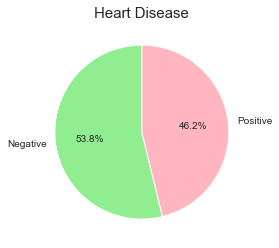

In [452]:
dict_binary = {'0': 'Negative', '1':'Positive'}
labels = [dict_binary[str(lb)] for lb in y_train_binary.value_counts().index]
plt.pie(y_train_binary.value_counts(), labels= labels, startangle=90, autopct='%1.1f%%', colors = ['lightgreen','lightpink']);

plt.gca().set_title('Heart Disease', fontsize= '15');

If we now consider four target categories, a notable imbalance is observed. As seen in the figure below, level zero is over-represented compared to the rest of categories. Furthemore, the higher target levels are the most under-represented. This uneven representation of our target values is critical and one should take this into account when training the model. 

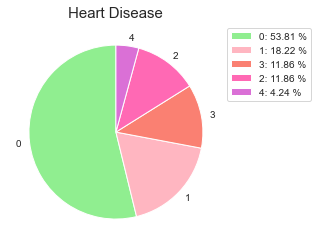

In [453]:
labels = y_train.value_counts().index
counts = y_train.value_counts()
plt.pie(counts, labels= labels, startangle=90, colors = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']);
labels_box = [f'{label}: {round(c*100/data_train_lb.shape[0],2)} %' for label, c in zip(labels, counts)]
plt.gca().legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)
plt.gca().set_title('Heart Disease', fontsize= '15');

Let's finally check the characteristics of our categorical features. For a better understanding, we create a dictionary with more informative feature names:

In [454]:
dict_fts = {'age': 'Age','sex': 'Sex', 'cp': 'Chest Pain', 'trestbps':'Resting Blood Pressure', 'chol': 'Serum Cholestoral [mg/dl]', 'fbs': 'Fasting Blood Sugar [> 120 mg/dl]', 
'restecg':'Resting Electrocardiographic Results', 'thalach':'Maximum Heart Rate Achieved', 'exang':'Exercise Induced Angina',
'oldpeak':'OldPeak','slope': 'Slope','ca':'Major Vessels','thal':'Thalassemia', 'target':'Heart Disease'}

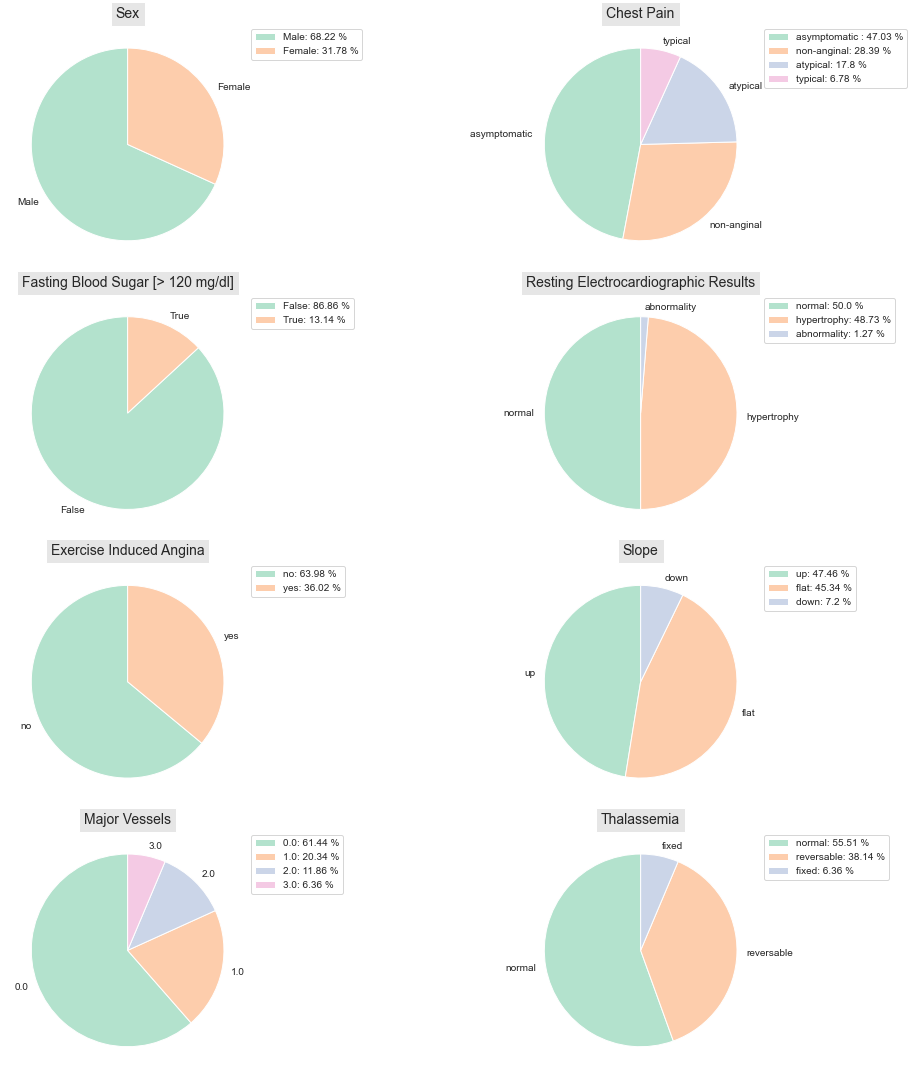

In [455]:
num = len(cat_ft)

fig = plt.figure(figsize=(15,30))

for i, ft in enumerate(cat_ft):

    counts = data_train_lb[ft].value_counts()
    colors = sns.color_palette('Pastel2')[0:len(counts)]
    labels = list(counts.index)

    plt.subplot(num,2,i+1)
    plt.pie(counts, colors= colors, startangle=90, labels = labels);

    plt.gca().set_title(dict_fts[ft], fontsize='14', bbox={'facecolor':'0.9', 'pad':5})

    labels_box = [f'{label}: {round(c*100/data_train_lb.shape[0],2)} %' for label, c in zip(labels, counts)]
    plt.gca().legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)

    i+=1

plt.tight_layout()

## 1.5.  Attributes influence on heart disease <a class="anchor" id="section_1_5"></a>

### 1.5.1. Binary target - Presence of heart disease <a class="anchor" id="section_1_5_1"></a>

Let's now take a closer look into the features relation with the target! We first look at our categorical features and how they relate to the existence of heart disease:

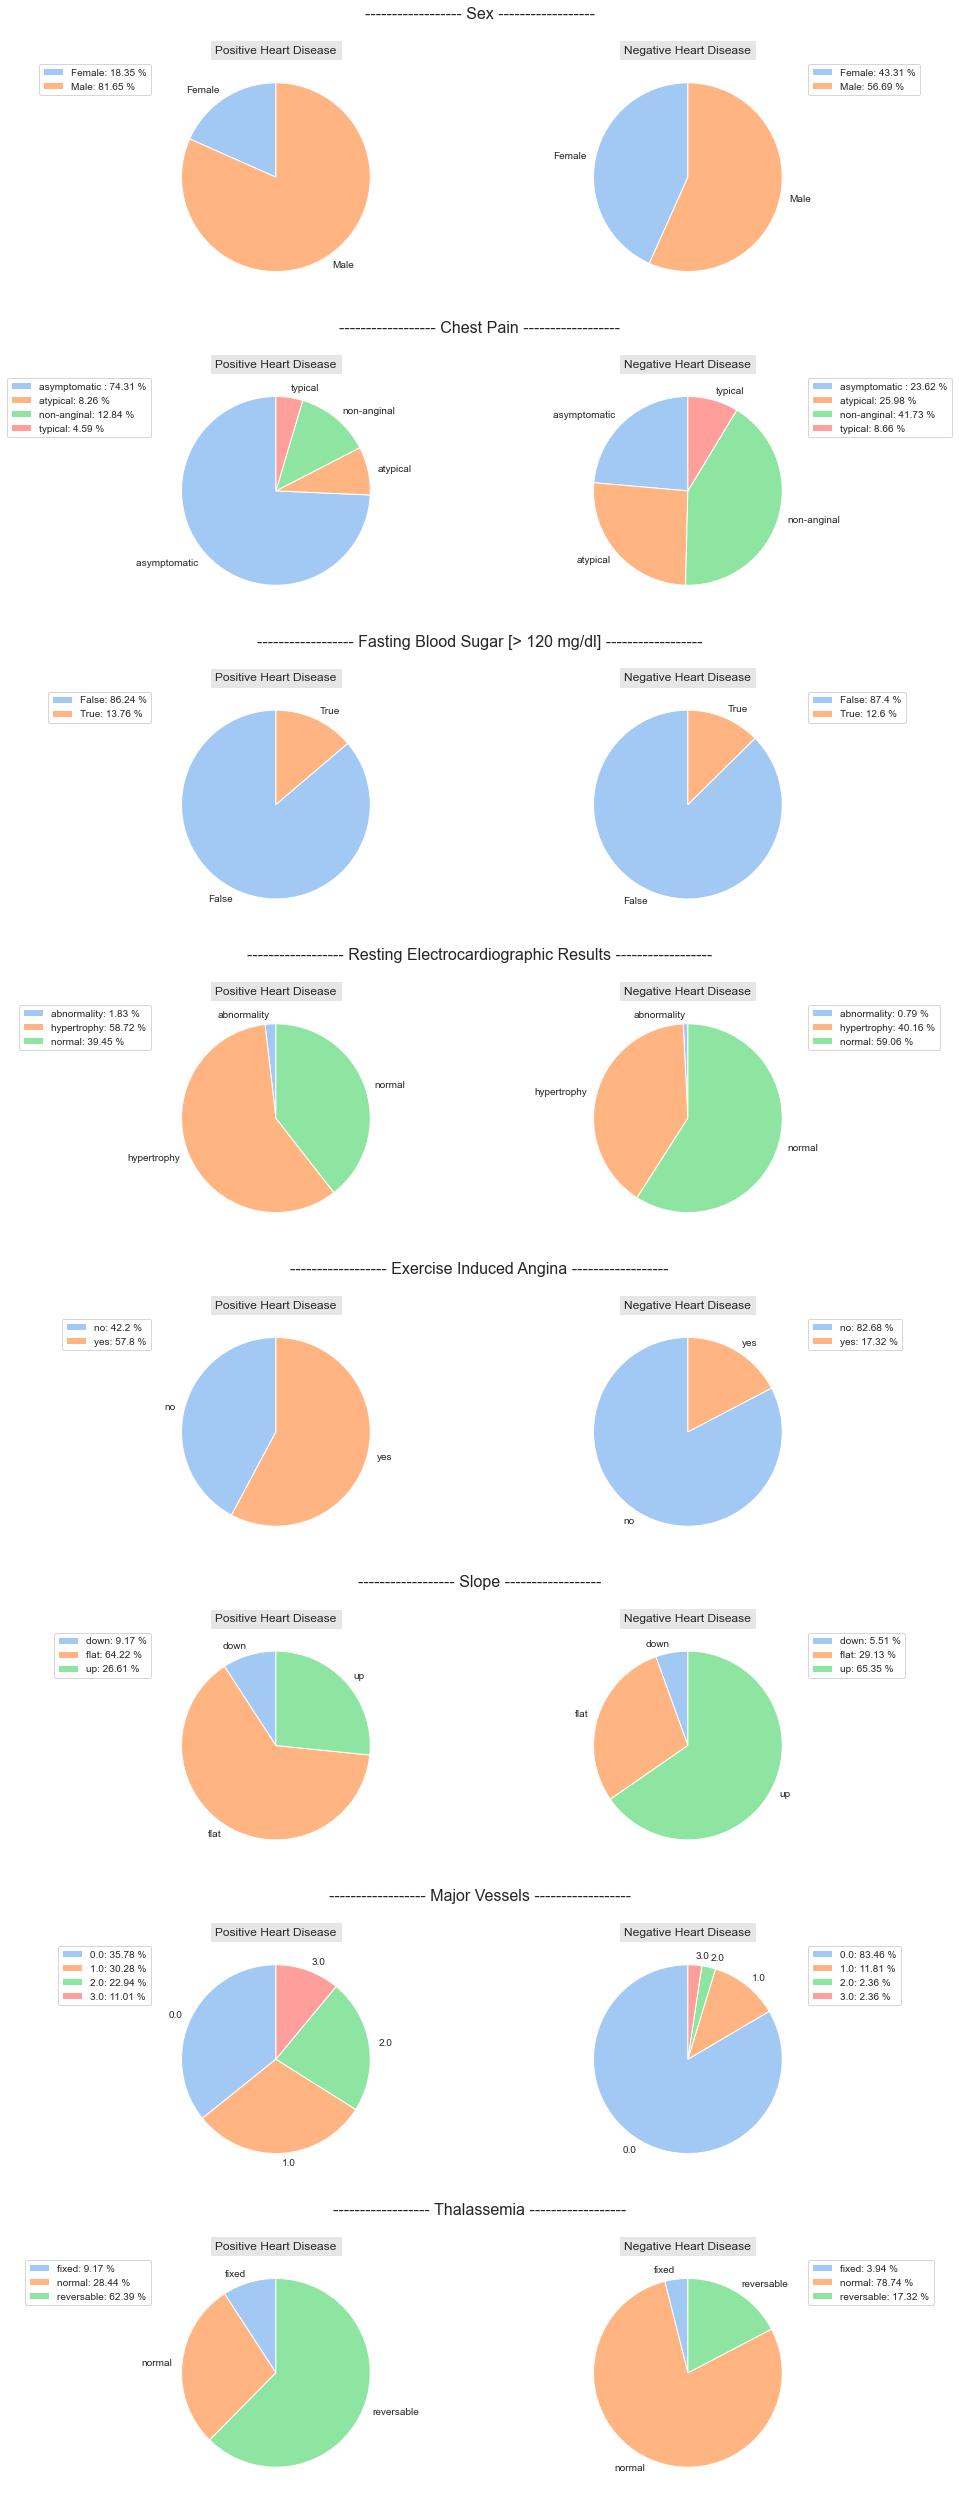

In [456]:
df_filtered = data_train_lb[cat_ft].nunique()

num_plots = len(df_filtered)
i=1

data_positive = data_train_lb[y_train!=0]
data_negative = data_train_lb[y_train==0]

fig, big_axes = plt.subplots(figsize=(15.0, 35.0) , nrows=num_plots, ncols=1) 

for row, big_ax in enumerate(big_axes, start=1):
    ft = df_filtered.index[row-1]
    big_ax.set_title(f'------------------ {dict_fts[ft]} ------------------ \n \n', fontsize=16)
    big_ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft = False, labelbottom = False )
    big_ax._frameon = False
    big_ax.grid(False)


for ft in df_filtered.index:

    ax = fig.add_subplot(num_plots,2,i)
    pos_ft_num = data_positive[ft].value_counts().sort_index()
    labels = list(pos_ft_num.index)

    colors = sns.color_palette('pastel')[0:len(pos_ft_num)]

    ax.pie(pos_ft_num, labels=labels, colors = colors, startangle=90)
    ax.set_title('Positive Heart Disease', bbox={'facecolor':'0.9', 'pad':5})
    labels_box = [f'{label}: {round(counts*100/data_positive.shape[0],2)} %' for label, counts in zip(labels, pos_ft_num)]
    ax.legend(labels_box, loc='best', bbox_to_anchor=(-0.01, 1.0), fontsize=10)


    ax = fig.add_subplot(num_plots,2,i+1)
    neg_ft_num = data_negative[ft].value_counts().sort_index()
    labels = list(neg_ft_num.index)


    ax.pie(neg_ft_num, labels= labels, colors= colors, startangle=90)
    ax.grid(None)
    ax.set_title('Negative Heart Disease', bbox={'facecolor':'0.9', 'pad':5})
    labels_box = [f'{label}: {round(counts*100/data_negative.shape[0],2)} %' for label, counts in zip(labels, neg_ft_num)]
    ax.legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)

    i=i+2

#fig.set_facecolor('w')
plt.tight_layout()
plt.show()

Based on the previous plots, we can see that positive heart disease cases mainly consist of men with asymptomatic chest pain, flat slope and reversable thalassemia. In these cases, the exercise induced angina does not show a strong impact, having similar representation for both positive and negative results. Looking at the major vessels, we can clearly see that, in general, a non-zero number of vessels are observed when heart disease is present. Nonetheless, we can observe that the probability of finding vessels slightly decreases with the number of these. 

On the other hand, negative cases are mainly represented by positive exercise induced angina, upwards slope, zero major vessels and normal thalassemia. Furthemore, non-anginal chest pains seems to be the most probable one, followed by asymptomatic chest pain with much less representation compared to positive heart disease cases. Moreover, we can see a balanced proportion of men and women.

Finally, we can observe that fasting blood sugar does not have a strong impact on the existence of heart disease, showing both positive and negative cases similar behaviour in this aspect.

Let's now look into our numerical features:

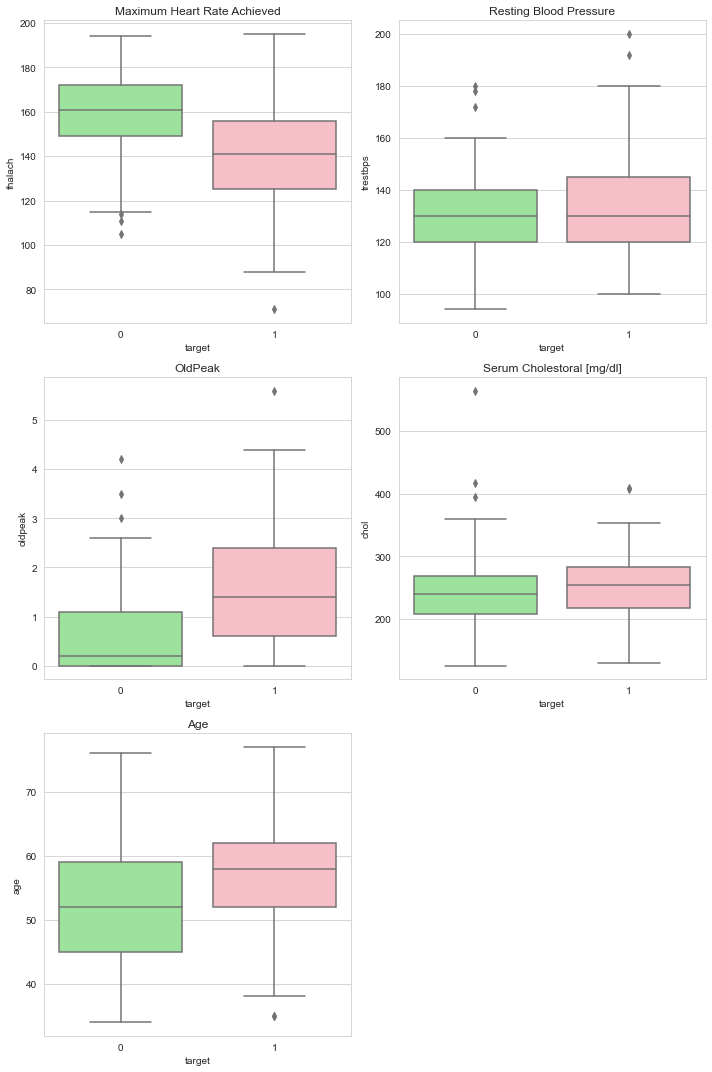

In [457]:
n_rows = len(num_ft)//2 + len(num_ft)%2

fig = plt.figure(figsize=(10.0, 15.0)) 

for (i,ft) in enumerate(num_ft):

    plt.subplot(n_rows, 2, i+1)
    sns.boxplot(y=data_train[ft], x =y_train_binary, palette = ['lightgreen','lightpink'])
    if ft in dict_fts:
        ft = dict_fts[ft]
        
    plt.title(f'{ft}')
    
#fig.set_facecolor('w')
plt.tight_layout()
plt.show()

As observed, positive diagnosis is usually found in older patients. Moreover, oldpeak values also seem to be higher in positive cases compared to healthy patients. Despite having similar mean maximum heart rate, we can also observe there is a larger proportion of sick patients with lower heart rate compared to healthy cases. Looking at the results from resting blood pressure and serum cholestoral, no significant difference is observed, thus presenting less impact on the diagnosis compared to other features.

Another way of visualizing at the previous numerical attributes is by making pair plots which also take into account the diagnosis:

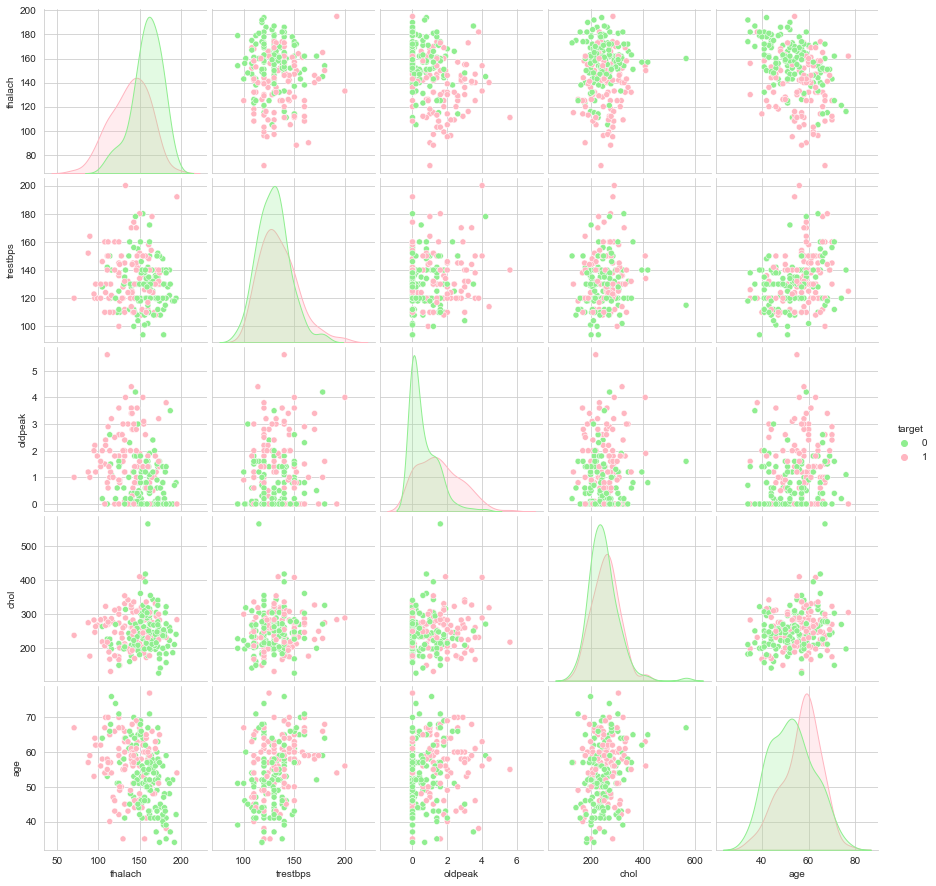

In [458]:
sns.pairplot(pd.concat([data_train_lb[num_ft], y_train_binary], axis=1), hue= 'target', diag_kind="kde", palette = ['lightgreen','lightpink'])

### Mutual information score

Mutual information allows us to measure of the similarity between two attributes. In this way, we can evaluate the level of influence of our features on a positive diagnosis of heart disease. Let's create a function that computes the mutual information scores and plot the results:

In [459]:
def make_plot_scores(dataset, feature, regression=False, cat_cols= cat_ft):

    # Create a copy of the train data removing all the rows containing missing values
    df_copy = dataset.dropna().copy()

    # We set the target
    y_copy = feature.copy()

    discrete_features = df_copy.columns.isin(cat_cols)

    # Obtain scores of mutual information

    if regression:
        scores = mutual_info_regression(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)
        pass
    else:
        scores = mutual_info_classif(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)

    list_features = []

    for name_ft in df_copy.columns:
        list_features.append(dict_fts[name_ft])

    scores = pd.Series(scores, name="Scores", index=list_features)

    # Retain positive non-zero scores
    scores = scores[scores > 0].sort_values(ascending = False)
    
    # Create bar plot
    width = np.arange(len(scores))
    ticks = list(scores.index)

    sns.set_style('whitegrid')
    sns.barplot(x = scores, y = width, orient='h', color='lightseagreen')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    return scores.sort_values(ascending = False)

Let's calculate the features influence on the heart disease presence:

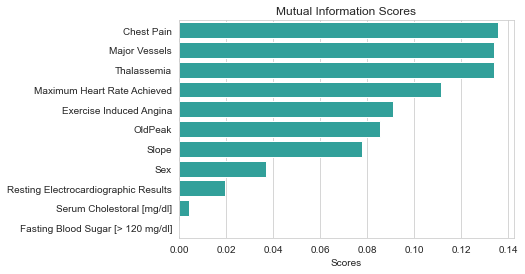

In [460]:
scores = make_plot_scores(dataset= data_train, feature=y_train_binary)

Based on the computed scores, the most influential features are the thalassemia results, the number of major vessels and the chest pain, followed by the maximum heart rate achieved. This outcome also coindices with the observations made previously.

### 1.5.2. Multiclass target - Type of heart disease <a class="anchor" id="section_1_5_2"></a>

We now do the same considering all four disease levels:

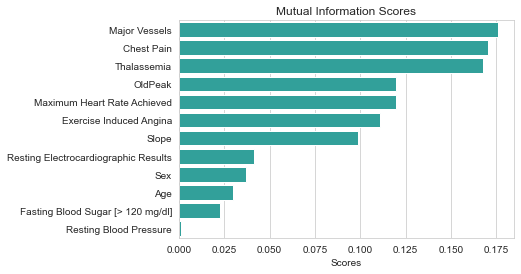

In [461]:
scores = make_plot_scores(dataset= data_train, feature=y_train)

According to the obtained scores, the features that have the most influence on the disease level are also the thalassemia results, the number of major vessels and the chest pain. Let's now visualize some of the most influential features:

In [462]:
def make_barplot(feature1, feature2, dataset = data_train, horizontal = False):

    dataset_obj = dataset.copy()

    color_palette = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']  

    if horizontal: 

        df = dataset_obj.groupby(feature1)[feature2].value_counts(normalize=True).mul(100).rename('Percentage %').reset_index()
       
        sns.barplot(y=feature1, x='Percentage %', hue=feature2, data=df, orient= 'h', palette = color_palette, edgecolor=(0,0,0))
        plt.xlim([0,100])

        if feature2 in dict_fts.keys():
            title = dict_fts[feature2]
        else:
            title=feature2
            
        plt.legend(loc='best', title=title)
        fg = plt.gcf()
        ax = plt.gca()

        for p in ax.patches:
            ax.annotate(f'{round(p.get_width(),1)}%', 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha = 'center', va = 'center', 
                        xytext = (30, 0), 
                        textcoords = 'offset points')

    else: 

        df = dataset_obj.groupby(feature1)[feature2].value_counts(normalize=True).mul(100).rename('Percentage %').reset_index()
        sns.barplot(x=feature1, y='Percentage %', hue=feature2, data=df, palette = color_palette, edgecolor=(0,0,0)) 

        plt.ylim([0,100])
        if feature2 in dict_fts.keys():
            title = dict_fts[feature2]
        else:
            title=feature2
        plt.legend(loc='best', title=title)

        fg = plt.gcf()
        ax = plt.gca()

        for p in ax.patches:
            ax.annotate(f'{round(p.get_height(),1)}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

    return (ax, fg)

### Heart Disease Diagnosis - Thalassemia

Let's first look at the distribution of the possible thalassemia categories based on the heart disease level. As expected, healthy patients are mainly characterised by normal thalassemia with nearly 80% of probability. On the other hand, positive heart disease patients are more probable to present reversable thalassemia. We can also see that the probability of having normal thalassemia decreses as the disease level increases.

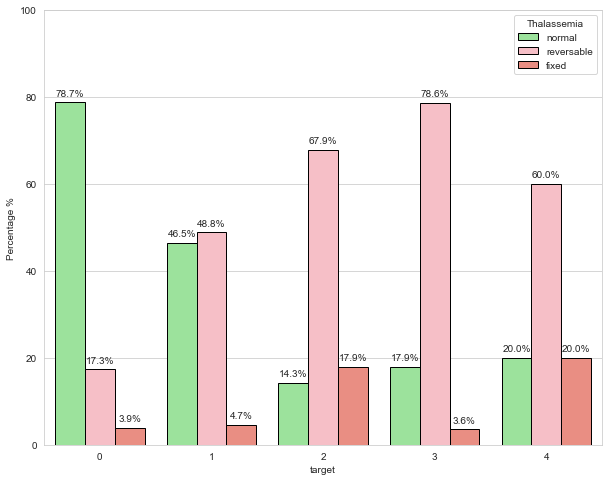

In [463]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','thal', dataset= pd.concat([data_train_lb,y_train], axis=1))

### Heart Disease Diagnosis - Chest Pain

Looking at the effect of the chest pain on heart disease, we clearly observe the asymptomatic behaviour to be the most predominant one in all the positive disease cases. On the other hand, the non-aginal pain is the most probable one in the healthy patients, and decresases its presence as the level of the disease increases. 

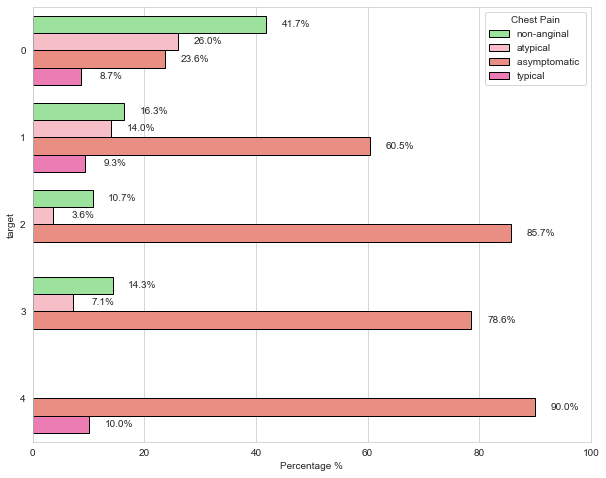

In [464]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','cp', dataset= pd.concat([data_train_lb,y_train], axis=1), horizontal=True)

### Heart Disease Diagnosis - Number of Major Vessels

In the case of major vessels, it can be observed that its number increases proportional to the disease level. Thus, healthy cases mostly present zero visible major vessels whereas patients with disease level 4 mainly present three vessels.

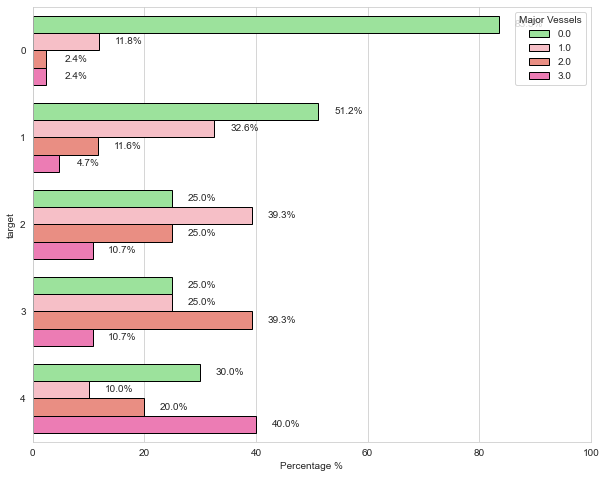

In [465]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','ca', dataset= pd.concat([data_train_lb,y_train], axis=1), horizontal=True)

### Heart Disease Diagnosis - Old Peak

As seen in the following figure, the mean oldpeak value appears to increase with higher heart disease levels:

In [466]:
def make_boxes(dataset, ft_x,ft_y):

    plt.figure(figsize=(10.0, 6.0)) 
    color_palette = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']

    sns.boxplot(y=dataset[ft_x], x =ft_y, palette = color_palette)

    if ft_x in dict_fts:
        ft_x = dict_fts[ft_x]
        
    plt.title(f'{ft_x}')

    plt.show()

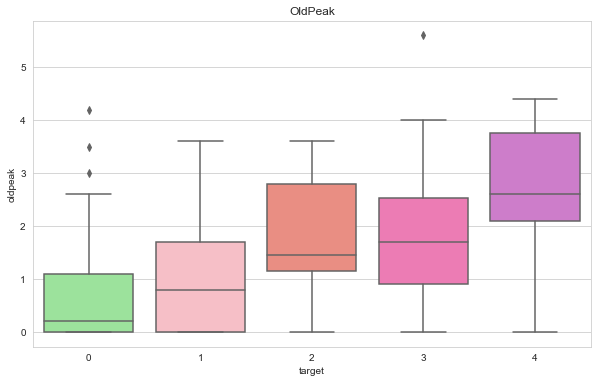

In [467]:
make_boxes(data_train, 'oldpeak', y_train)

### Heart Disease Diagnosis - Maximum Heart Rate Achieved

Results for the maximum heart rate achieved show high values for healthy patients. When having positive diagnosis, the achieved rate is seen to be lower and generally tends to further decrease as the disease type increases:

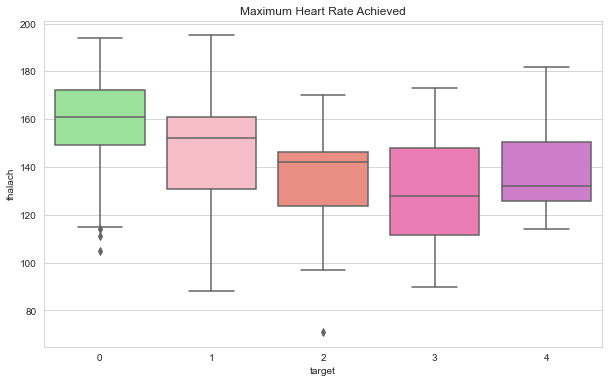

In [468]:
make_boxes(data_train, 'thalach', y_train)

### Heart Disease Diagnosis - Excercised Induced Angina

Positive exercise induce angina is observed to be most common in healthy patients, representing 82% of this cases. However, when positive diagnosis is considered, the proportion of negative exercise induce angina increases, representing 75% of cases with type 3 positive diagnosis.

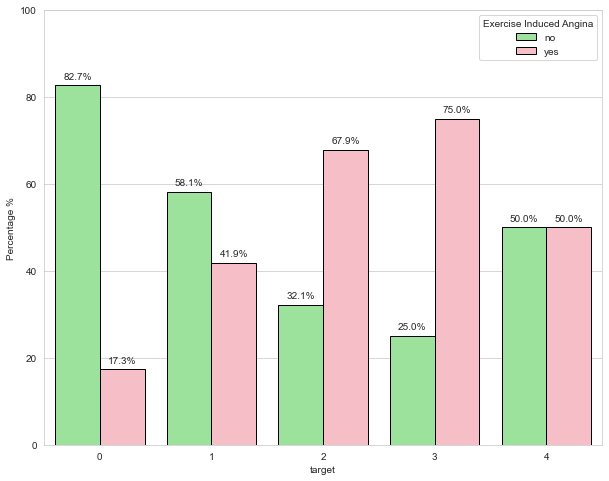

In [469]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','exang', dataset= pd.concat([data_train_lb,y_train], axis=1))

### Heart Disease Diagnosis - Slope

As shown in the figure below, we can clearly see that upwards slope is mainly found in healthy patients, as expected from previous observations. Once the disease is detected, the most probable slope to observe is the flat slope. Moreover, the presence of upward slopes decreases as the level of heart disease increases. Even though the flat behaviour is the most probable one to find in all disease levels, we can observe that downwards slope is more present at the highest levels.

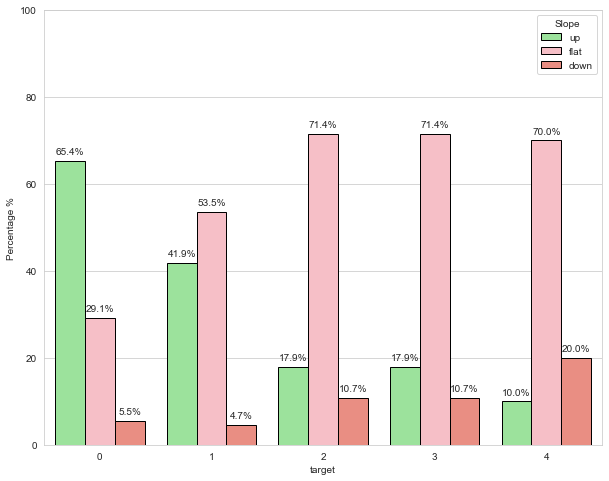

In [470]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','slope', dataset= pd.concat([data_train_lb,y_train], axis=1))

# 2. Data pre-processing <a class="anchor" id="chapter2"></a>

## 2.1. Encode categorical features  <a class="anchor" id="section_2_1"></a>

Prior to the application of any learning model, it is important to pre-process our data so that the input variables are in a compatible and efficient format. In the case of categorical variables, they should be encoded to numerical values. One way of encoding our categorical variables is to assign a numerical value as a label to each category included in a given feature. Another way would be to create multiple extra binary features for each subcategory. The latter can be done by means of OneHotEncoder algorithm:

In [471]:
# Apply one-hot encoder to each column with categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(encoder.fit_transform(data_train[cat_ft]))
test_encoded = pd.DataFrame(encoder.transform(data_test[cat_ft]))

# Redefine index
train_encoded.index = data_train.index
test_encoded.index = data_test.index

# Set informative feature names
train_encoded.columns = encoder.get_feature_names_out(cat_ft)
test_encoded.columns = encoder.get_feature_names_out(cat_ft)

# Fetch numerical variable
num_train = data_train.drop(cat_ft, axis=1)
num_test = data_test.drop(cat_ft, axis=1)

# Add one-hot encoded categorical data to numerical features
train_encoded = pd.concat([num_train, train_encoded], axis=1)
test_encoded = pd.concat([num_test, test_encoded], axis=1)

Let's look now at the encoded data! The results show that for a given feature such as 'sex', the latter was replaced by two binary features corresponding to its subcategories of man and woman. In this way, male patients will only have a unit value in the column corresponding to this subcategory. 

In [472]:
train_encoded[train_encoded.columns.difference(num_ft)].head()

ca_0.0  ca_1.0  ca_2.0  ca_3.0  cp_1.0  cp_2.0  cp_3.0  cp_4.0  \
116     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0   
87      1.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
183     1.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
225     0.0     1.0     0.0     0.0     0.0     0.0     0.0     1.0   
56      1.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   

     exang_0.0  exang_1.0  ...  restecg_1.0  restecg_2.0  sex_0.0  sex_1.0  \
116        0.0        1.0  ...          0.0          1.0      0.0      1.0   
87         1.0        0.0  ...          0.0          1.0      1.0      0.0   
183        1.0        0.0  ...          0.0          0.0      0.0      1.0   
225        0.0        1.0  ...          0.0          1.0      0.0      1.0   
56         1.0        0.0  ...          0.0          1.0      0.0      1.0   

     slope_1.0  slope_2.0  slope_3.0  thal_3.0  thal_6.0  thal_7.0  
116        1.0        0.0        0.0       0.0       0.0       1.0  
87         1.0        0.0        0.0       1.0       0.0       0.0  
183        0.0        0.0        1.0       0.0       0.0       1.0  
225        1.0        0.0        0.0       1.0       0.0       0.0  
56         1.0        0.0        0.0       0.0       0.0       1.0  

[5 rows x 23 columns]

In [473]:
train_encoded[['sex_0.0','sex_1.0']].head()

sex_0.0  sex_1.0
116      0.0      1.0
87       1.0      0.0
183      0.0      1.0
225      0.0      1.0
56       0.0      1.0

We do the same considering only the dataset with positive diagnosis:

In [474]:
# Apply one-hot encoder to each column with categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded_pos = pd.DataFrame(encoder.fit_transform(data_train_pos[cat_ft]))
test_encoded_pos = pd.DataFrame(encoder.transform(data_test_pos[cat_ft]))

# Redefine index
train_encoded_pos.index = data_train_pos.index
test_encoded_pos.index = data_test_pos.index

# Set informative feature names
train_encoded_pos.columns = encoder.get_feature_names_out(cat_ft)
test_encoded_pos.columns = encoder.get_feature_names_out(cat_ft)

# Fetch numerical variable
num_train = data_train_pos.drop(cat_ft, axis=1)
num_test = data_test_pos.drop(cat_ft, axis=1)

# Add one-hot encoded categorical data to numerical features
train_encoded_pos = pd.concat([num_train, train_encoded_pos], axis=1)
test_encoded_pos = pd.concat([num_test, test_encoded_pos], axis=1)

## 2.2. Scale numerical features  <a class="anchor" id="section_2_2"></a>

In the case of numerical variables, it is advantageous that all are represented in the same scale and distribution. It should be taken into account that our numerical data involves different orders of magnitudes depending on which feature we are looking at. This difference results in a wide scale range of weight values, which are devisive when training the model. The latter leads to poor performance and inapropiate learning, as the larger, and thus most-influential, weights will be affected by the input order of magnitude. In this way, instability and convergence problems arise. In order to address these issues, a standard normal distribution of input data is desired. For that end, we apply a standar scaler so that our input features have zero mean and unit variance:

In [475]:
scaler = StandardScaler()

train_scaled= pd.DataFrame(scaler.fit_transform(train_encoded[num_ft]))
test_scaled= pd.DataFrame(scaler.transform(test_encoded[num_ft]))

# Redefine index
train_scaled.index = train_encoded.index
test_scaled.index = test_encoded.index

train_scaled.columns = num_ft
test_scaled.columns = num_ft

# Fetch encoded features 
cat_train = train_encoded.drop(num_ft, axis=1)
cat_test = test_encoded.drop(num_ft, axis=1)

# Add scaled numerical variables to encoded features
train_prep = pd.concat([cat_train, train_scaled], axis=1)
test_prep = pd.concat([cat_test, test_scaled], axis=1)


In [476]:
train_prep[num_ft].describe()

thalach      trestbps       oldpeak          chol           age
count  2.360000e+02  2.360000e+02  2.360000e+02  2.360000e+02  2.360000e+02
mean   2.672062e-16  2.370985e-16  1.543022e-16  1.505387e-17  3.229526e-16
std    1.002125e+00  1.002125e+00  1.002125e+00  1.002125e+00  1.002125e+00
min   -3.403181e+00 -2.148870e+00 -9.297534e-01 -2.259108e+00 -2.277014e+00
25%   -6.094809e-01 -6.640202e-01 -9.297534e-01 -7.047898e-01 -7.283821e-01
50%    1.405786e-01 -9.292410e-02 -2.156060e-01 -8.306230e-02  1.012423e-01
75%    6.949704e-01  4.781720e-01  4.985415e-01  5.340937e-01  7.096335e-01
max    1.988551e+00  3.904748e+00  4.069279e+00  5.750204e+00  2.479499e+00

Similarly, we scale our positive diagnosis sets:

In [477]:
scaler = StandardScaler()

train_scaled_pos= pd.DataFrame(scaler.fit_transform(train_encoded_pos[num_ft]))
test_scaled_pos= pd.DataFrame(scaler.transform(test_encoded_pos[num_ft]))

# Redefine index
train_scaled_pos.index = train_encoded_pos.index
test_scaled_pos.index = test_encoded_pos.index

train_scaled_pos.columns = num_ft
test_scaled_pos.columns = num_ft

# Fetch encoded features 
cat_train = train_encoded_pos.drop(num_ft, axis=1)
cat_test = test_encoded_pos.drop(num_ft, axis=1)

# Add scaled numerical variables to encoded features
train_prep_pos = pd.concat([cat_train, train_scaled_pos], axis=1)
test_prep_pos = pd.concat([cat_test, test_scaled_pos], axis=1)

# 3. UMAP: Uniform Manifold Approximation and Projection <a class="anchor" id="chapter3"></a>

We previously look at the influence of each individual feature on the target variable and we could find some patterns that might give insight on how our disease levels are characterised. Nonetheless, the actual feature space might not be the most effective one to represent our target variable. In this way, target characterisation could be more efficiently approached based on a more refined and concise feature space. The latter would hence consist of a more simple but yet more sophisticated set of features. To that end, a new feature space is computed based on non-linear dimension reduction UMAP technique. An ellaborated description of UMAP method can be found [here](https://umap-learn.readthedocs.io/en/latest/index.html).

In this case, we use UMAP to project our original high-dimensional feature space into two-dimensions for better visualization of our data structure. Furthermore, we are just going to consider the training set for pattern identification and see how this can be related to the existing target variables. Let's create a function that computes the two-dimensional variables from the original feature space and which allows a parametric study of the minimum distance and number of neighbors used by UMAP algorithm:

In [478]:
def make_umap(neighbors_list, dist_list, X, y):

    color_palette = sns.color_palette("husl", y.nunique())
    i=1

    for n in neighbors_list:

        for d in dist_list:

            reducer = umap.UMAP(min_dist=d, n_components=2, n_neighbors=n, random_state=42)
            mapper = reducer.fit(X)
            embedding_train = mapper.transform(X)

            train_2d = pd.DataFrame(embedding_train, index= X.index, columns=['var0', 'var1'])
            data_2d = pd.concat([train_2d, y], axis=1)

            legend = False 
            if i == (1):
                legend = True

            plt.subplot(len(neighbors_list) ,len(dist_list),i)
            sns.scatterplot(x= data_2d['var0'], y= data_2d['var1'], hue=data_2d['target'], palette= color_palette, legend = legend)
            plt.title(f'Minimum distance: {d}, neighbors: {n}')
            plt.gca().set_aspect('equal', 'datalim')
            i+=1

            if n == neighbors_list[-1]:
                plt.gca().set_xlabel('var0')
            else: plt.gca().set_xlabel(' ')

    plt.show()

Visualization of results is shown in the figures below. The scattered distribution of points in two-dimensions represents the UMAP results obtained from the training data for different parameter set-up. This distribution has been computed independently of our target variables. In this way, we can see how our data structure looks like and if any existing patterns can be identified based on the distribution of points. Ideally, the resulting distribution should clearly resemble a number of local structures corresponding to the possible target categories. Therefore, once the UMAP distribution has been computed, we classify each point taking into account their corresponding target category based on a color map for better visualization.

 Looking at the results below and the distribution of points, we can see that the global structure of our data is generally compacted. However, two local structures can be distinguished in certain plots. This would mean that two patterns could be identidied from our data for classification. If we take into account the actual target variables, we can observe that the negative cases (category 0) are mainly located together, forming one of the spotted structures. However, the four positive values (categories 1, 2, 3 and 4) are scattered all together forming the other structure, with neither clear boundary nor substantial differentation between them. This issue would mean that our training data allows to identify negative and positive diagnosis but is not able to provide good characterisation of each individual type of disease. 

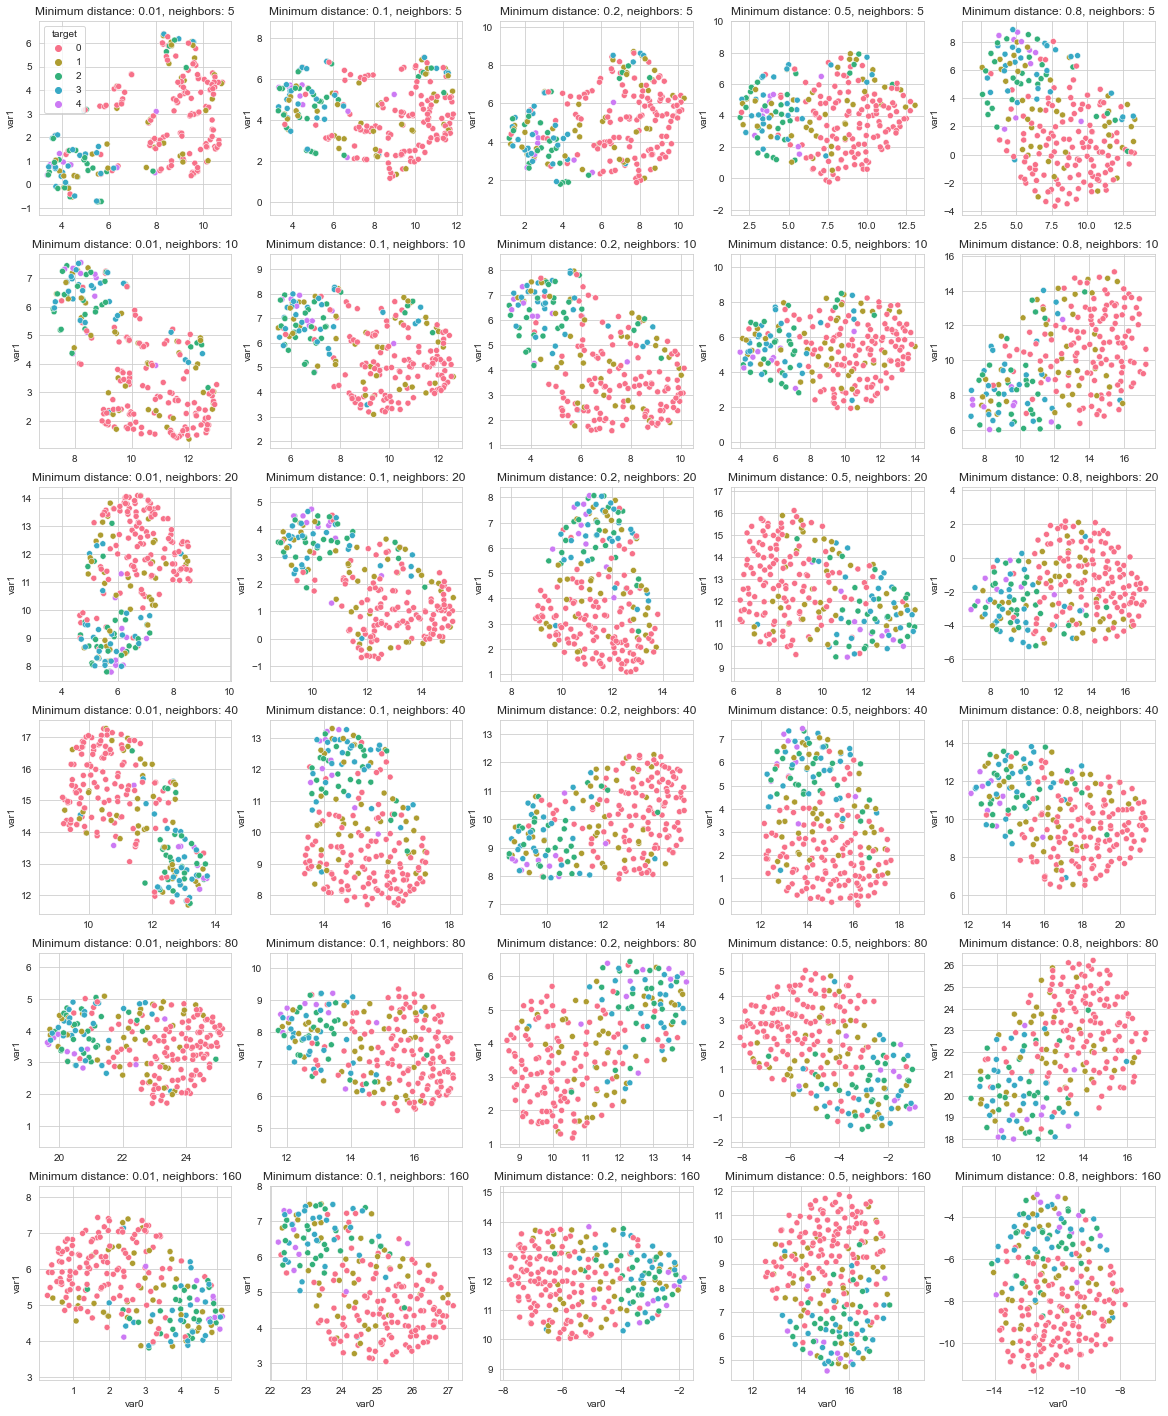

In [479]:
neighbors_list = [5, 10, 20, 40, 80, 160]
dist_list = [0.01, 0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(20,25))
make_umap(neighbors_list, dist_list, train_prep, y_train);

For better visualization, we plot the previous figures considering only binary target classification (positive and negative diagnosis only). As observed, even the global structure is still compacted, we can distinguish these two local structures:

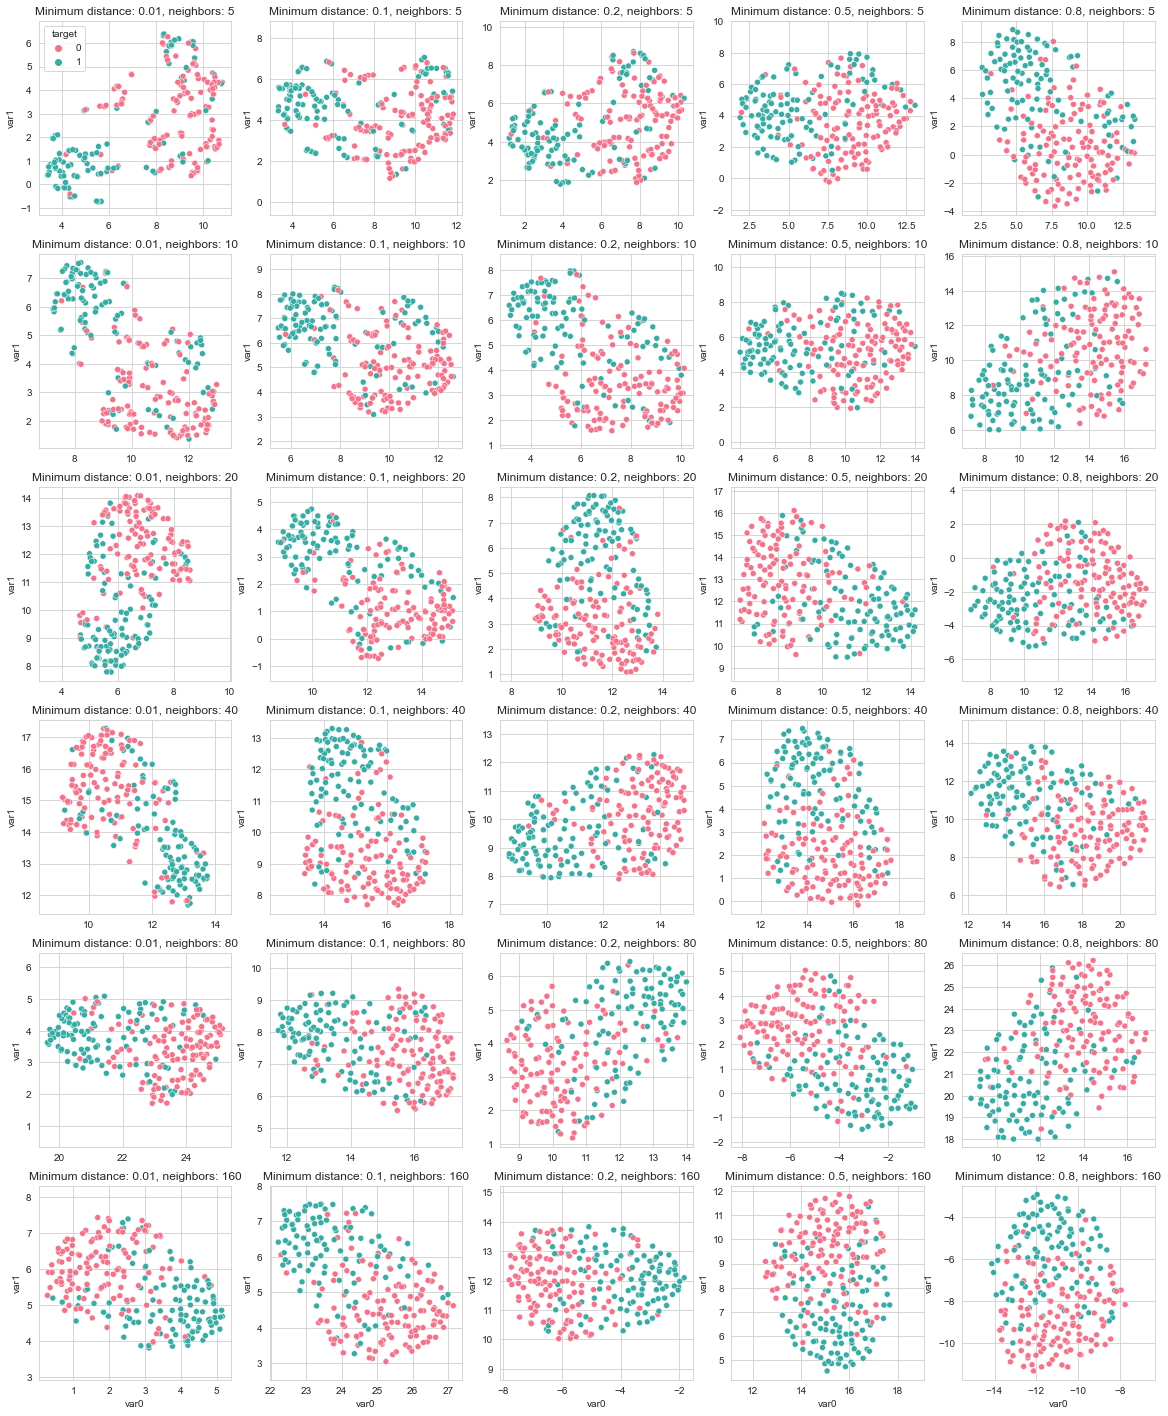

In [480]:
neighbors_list = [5, 10, 20, 40, 80, 160]
dist_list = [0.01, 0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(20,25))
make_umap(neighbors_list, dist_list, train_prep, y_train_binary);

We now consider only the data corresponding to positive diagnosis and their corresponding type (categories 1, 2, 3 and 4). Similarly as before, compacted structures with no noticeable boundaries or susbtantial distinction of the disease type can be observed from the point distribution. Therefore, our training features do not provide enough information for identification of the disease type. More informative features and data would be needed for a proper disease categorisation.

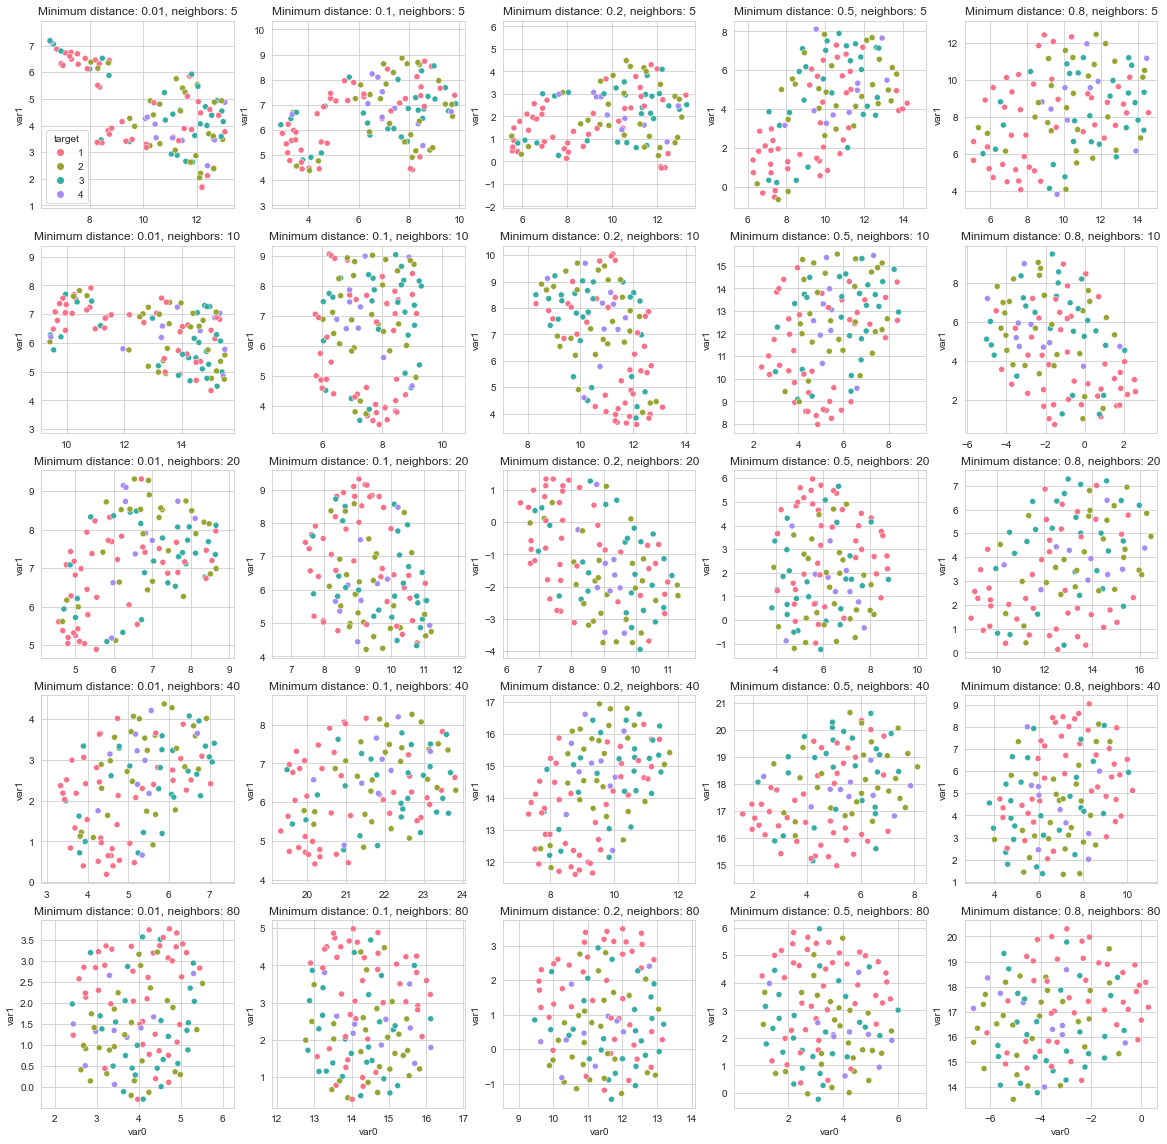

In [481]:
neighbors_list = [5, 10, 20, 40, 80]
dist_list = [0.01, 0.1, 0.2, 0.5, 0.8]

fig = plt.figure(figsize=(20,20))
make_umap(neighbors_list, dist_list, train_prep_pos, y_train_pos);

# 4. Classification Models <a class="anchor" id="chapter4"></a>

In order to evaluate the performance of the model. we will use cross-validation. In this way, the data is further splitted into a train and validation dataset. The former is employed for training the model and the latter is used for making predictions based on the output obtained from the training process. The assement of the model is done by computing the evaluation score of the algorithm in both the training and validation dataset. This whole process is repeatedly done in order to obtain a series of values out of which we can calculate the mean scores and their standard deviation. The repetition of this process ensures better representation of the data and does not only rely on an unique choice of training samples which could reflect the features' distribution properly. Hence, more reliability is achieved by looking at different subsets.

Furthermore, learning curves are computed also based on cross-validation. Learning curves are important in order to evaluate if overfitting or underfitting would take place. The latter implies poor performance on the training data and thus the model needs to more refined to achieve a satisfactory accuracy. The former however implies that the model performs quite well on the training data but is not good for generalising, that is, it is too sensible to any changes in the data and does not lead to good predictions when applied to new values. In this case, the learning curves illustrate the score variation as a function of number of the training samples for both the validation and training data. If both accuracies converge to a value together and the score value is high, the model will be suitable for future predictions. However, if the scores converge to a low value means that the model is underfitting. In the case of overfitting, no convergence is achieved and there a gap remains between the training and validation scores.

In this case, the evaluation metric used in both cross-validation and learning curves is the weighted F1-score. This selection is done taking into account that F1 score is computed based on precision and recall metrics and also the fact that there is an imbalanced distribution of our target variables.

As aforementioned, a series of classification models are tested and their evaluation metrics are computed. In addition, an assessment of the most important model's parameters is done in order to improve the performance.

In order to undertand the evaluation metrics it is important to have the following concepts:

* True Positives (TP): for a given class, the portion of the model which was predicted as positive and whose target was actually positive, that is, portion of positive cases which were correctly predicted. For multiclass classification, a datapoint will be positive in one of the classes and negative in the rest. True positives will be those datapoints that are predicted positive in the actual class.  

* False Positives (FP): or a given class, the portion of the model which was predicted as positive and whose target was actually negative, that is, portion of negative cases which were incorrectly predicted. For multiclass classification, false positives will be predicted as positive in the wrong class and negative in the rest of classes (thus, in the actual class). 

* False Negatives (FN): or a given class, the portion of real positive cases which were wrongly classified as negative.

* True Negatives (TN): or a given class, the portion of real negative cases which were correctly classified as negative.

Once the previous definitions are clear, we can define the evaluation metrics:

* Accuracy: ratio of correct predictions to the total number of samples. Despite the fact it is intuitive to think that higher accuracy undoubtely implies that our model presents a good performance, it does not necessarily mean that. The reason for this is that we can have a non-even distribution of the target classes such as in this case. Therefore, achieving a high accuracy would be mainly affected by how well the over-represented cases are predicted. If our model does not properly identify the under-represented cases this would not be clearly reflected by the accuracy.

* Recall: for a given class, proportion of actual positives which was correctly identified. This metric is highly revelant as we aim to identify as much positive heart disease cases as there actually are (category 1 or above). In this case as in many diseases, we do not want to lose what could be a postivive diagnosis as the risk of missing it is quite dangerous, so we would prefer to be convervative in this sense. In this case we want the recall metric to be as high as possible, which would mean we are not missing so many true positive heart disease cases. Achieving no false negatives would imply that our model has a recall of 1.0 in the positive cases with respect to the negative cases. For multiclass classification, we need to compute this metric for each class. 

* F1-score: harmonic mean of precision and recall. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 

Let's now define functions to compute cross-validation and learning curves:

In [482]:
def plot_val_curve(model_name, param_name, param_list, get_train_test_scores, X_train, y_train, my_model):
    
    train_scores, val_scores = get_train_test_scores(model_name, my_model, X_train, y_train, param_name, param_list)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    pos_max = np.argmax(val_scores_mean)
    
    print(f'The maximum mean score achieved in validation set is {round(np.max(val_scores_mean)*100,1)}% with {param_name}={param_list[pos_max]}')

    plt.figure()
    plt.title(f'{model_name} - Validation Curve')

    plt.xlabel(f'{param_name}')
    plt.ylabel('Score')
    #plt.ylim([0.5, 1.0])

    plt.grid(True)
    lw=2

    plt.semilogx(param_list, train_scores_mean, 'o-', label='Training score', color='lightgreen', lw=lw)
    plt.fill_between(param_list, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='lightgreen', lw=lw)
    plt.semilogx(param_list, val_scores_mean, 'o-', label='Cross-validation score', color='hotpink', lw=lw)
    plt.fill_between(param_list, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='hotpink', lw=lw)

    plt.legend(loc="best")
    
    return plt.gca()

In [483]:
def get_train_test_scores(model_name, my_model, X_train, y_train, param_name, param_list):
    #param_name_transform = model_name.lower().replace(" ", "") + '__' + param_name
    
    print(f'{model_name}: {param_name} parameter variation.')
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    train_scores, val_scores = validation_curve(my_model, X_train.values, y_train.values, 
                                             param_name =param_name,
                                             param_range = param_list, cv= cv, scoring='f1_weighted')

    return train_scores, val_scores

In [484]:
def plot_learning_curve(model_name, model, X_train, y_train):

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv = cv, scoring='f1_weighted', train_sizes= np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(test_scores, axis=1)
    val_scores_std = np.std(test_scores, axis=1)

    plt.title(f'{model_name} - Learning Curve')

    plt.xlabel('Training samples')
    plt.ylabel('Score')

    plt.grid(True)
    lw=2

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color='darkturquoise')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,color='darkturquoise', lw=lw)
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score', color= 'darkorange')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='darkorange', lw=lw)

    print(f'The maximum mean score achieved in validation set is {round(np.max(val_scores_mean)*100,1)}%')

    plt.legend(loc="best")

    return plt.gca()

## 4.1. Binary Classification <a class="anchor" id="chapter4_1"></a>

Based on the previous UMAP results, we now focus on binary classification in terms of positive and negative diagnosis.

## 4.1.2. K Neighbors <a class="anchor" id="chapter_4_1_1"></a>

K-neighbors model, as the name indicates, simply classifies our datapoints based on the number of nearest neighbors. More information about how this model works can be found [here](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn). Consering this, we compute the cross-validation curves for different number of neighbors:

K Neighbors Classifier: n_neighbors parameter variation.
The maximum mean score achieved in validation set is 81.9% with n_neighbors=5


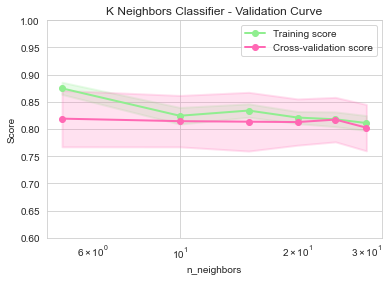

In [485]:
neighbors_list= [5, 10, 15, 20, 25, 30]

class_model = KNeighborsClassifier()

pt = plot_val_curve('K Neighbors Classifier', 'n_neighbors', neighbors_list, get_train_test_scores, train_prep, y_train_binary, class_model);
pt.set_ylim([0.6, 1.0]);

As observed, the weighted F1-score presents good stable values above 0.8 for the tested number of neighbors. Let's now check the learning curves:

The maximum mean score achieved in validation set is 81.9%


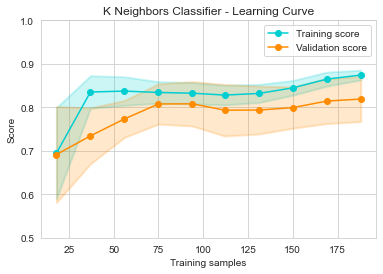

In [486]:
class_model = KNeighborsClassifier(n_neighbors = 5)
pt= plot_learning_curve('K Neighbors Classifier',class_model, train_prep.values, y_train_binary);
pt.set_ylim([0.5, 1.0]);

As seen in the figure above, adding more training datapoints keeps improving the score due to the nature of the k-neighbors method. Furthemore, we can see that both training and validation scores are close and achieve satisfactory F1 values above 0.8. 

Let's now make predictions based on unseen data and then compute the evaluation metrics:

In [487]:
predict = KNeighborsClassifier(n_neighbors = 5).fit(train_prep.values, y_train_binary).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In this classification report, support values are the number of datapoints from the test set corresponding to each class. Furthermore, macro average is the unweighted mean of the evaluation metric whereas weighted average, as the name indicates, fix this according to the data imbalance by applying higher and lower weights to under- and over-represented categories respectively. 

As observed, high values above 0.8 are achieved in all weighted scores. Prediction metrics allows us to know how many instances of the predicted class values are actually that class (the proportion of the predited positives which is truly positive), whereas recall allows us to know the how many instances of the actual class were properly predicted (the proportion of actual positives which is correctly classified). Looking at the recall value for positive classes, we can see a value of 0.89 was obtained, which means 89% of patients with an actual heart disease were identified. From those with an identified heart disease, 83% did actually present that condition, as seen from the precision value. Looking at the negative diagnosis, 90% of the patients with negative prediction (no heart disease) did actually have that condition according to the precision, whereas 84% of actual healthy patients were identified as healthy cases as reflected in the recall metric. Since we are now working with a binary classification problem, it makes sense that the precision obtained for negative cases has the same values (or nearly the same) as the recall obtained for positive cases. Similarly, recall for negative cases has the same values as the precision for positive cases. Furthermore, a weighted F1-score of 0.87 was obtained, which represents a good value.

## 4.1.2 Decision Tree <a class="anchor" id="chapter_4_1_2"></a>

Let's now test the decision tree classifier! This model resembles a flowchart-like tree structure with recursive partitioning. In this way, each datapoint goes through a series of branches where a series of decisions are made based on the value of its features until a category is assigned when it reaches the leafnode. More information about how this model works can be found [here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python). In this case, we are going to study the effect of the maximum depth of tree on the F1-score results. Moreover, we set the class weight to be balanced so that the existing imbalance in the target categores is taken into account and fixed.

Decision Tree Classifier: max_depth parameter variation.
The maximum mean score achieved in validation set is 73.8% with max_depth=2


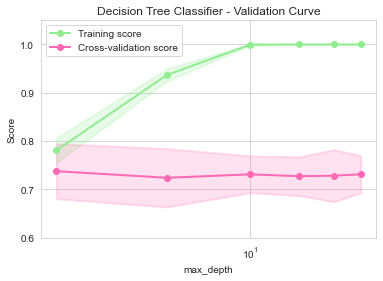

In [488]:
depth_list = [2, 5, 10, 15, 20, 25]

class_model = DecisionTreeClassifier(class_weight='balanced')

pt = plot_val_curve('Decision Tree Classifier', 'max_depth', 
                    depth_list, get_train_test_scores, train_prep, y_train_binary, class_model);
pt.set_ylim([0.6, 1.05]);

As seen in the figure above, the training score keeps increasing with the depth of the tree whereas no effect is observed in the validation score, which remains stable around 0.74. Let's now look at the learning curves:

The maximum mean score achieved in validation set is 73.4%


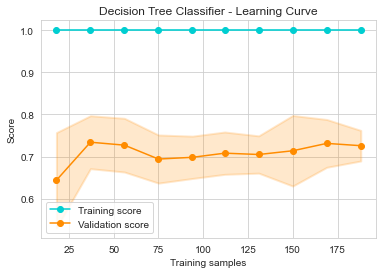

In [489]:
class_model =DecisionTreeClassifier(class_weight='balanced')
pt = plot_learning_curve('Decision Tree Classifier', class_model, train_prep.values, y_train_binary);

In this case, the model does not seem to gain noticeable learning as the number of samples increase. Actually, the maximum score is achived in the training set from the very beggining, whereas the validation score does not seem to improve. This means our model is prone to over-fitting. This behaviour however, is characteristic of the current model we are employing. Decision trees are characterised by having extremely low bias (thus, high variance and over-fitting). Furthemore, considering the architecture of this model, the validation data will simply pass through an already determined set of tree branches where simple decisions are taken.  

Let's now make predictions based on unseen data and then compute the evaluation metrics:

In [490]:
predict = DecisionTreeClassifier(class_weight='balanced', random_state=3).fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



Precision and recall values of 0.79 were obtained for negative and positive cases, which makes sense due to the binary nature of the problem. The latter means that 79% of the actual positive cases were predicted as positive diagnosis. However, the evaluation metrics in this case show worse performance compared to the previous model.

## 4.1.3. Random Forest <a class="anchor" id="chapter_4_1_3"></a>

The next model is the random forest classifier. This model consist of a series of decision trees applied to various sub-samples of the training set. For classification tasks, the output of the random forest is the class selected by most trees. More information about how this model works can be found [here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python). In this case, we are going to study the effect of number of estimators or trees and the maximum depth on the F1-score results. In the same way as before, we set the class weight to be balanced so that the existing imbalance in the target categores is taken into account and fixed.

Random Forest Classifier: n_estimators parameter variation.
The maximum mean score achieved in validation set is 80.5% with n_estimators=100


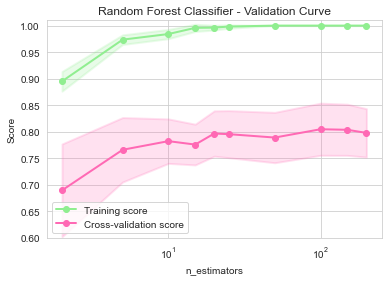

In [491]:
n_estimators = [2, 5, 10, 15, 20, 25, 50, 100, 150, 200]
class_model = RandomForestClassifier(class_weight='balanced')
pt = plot_val_curve('Random Forest Classifier', 'n_estimators', n_estimators, get_train_test_scores, train_prep, y_train_binary, class_model);
pt.set_ylim([0.6, 1.01]);

As observed, the F1-scores for both the training and validation sets keep increasing when more estimators are considered. In this case, an score of 0.8 is achieved in the training set when 100 estimators are used.

Random Forest Classifier: max_depth parameter variation.
The maximum mean score achieved in validation set is 81.3% with max_depth=5


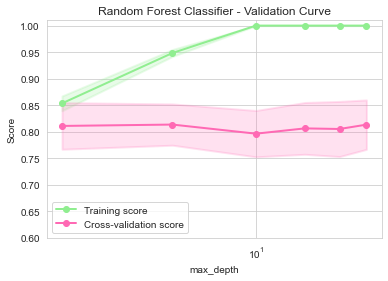

In [492]:
depth_list = [2, 5, 10, 15, 20, 25]
class_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
pt = plot_val_curve('Random Forest Classifier', 'max_depth', depth_list, get_train_test_scores, train_prep, y_train_binary, class_model);
pt.set_ylim([0.6, 1.01]);

In the case of the maximum tree depth, no substantial improvement is seen in the validation set, whereas the training set keeps getting better results, as was to be expected.

If we look at the learning curves, we can see that, even values above 0.8 are achieved, the validation curve remains stable around this score and thus the performance of the model would not improve if more samples were added. The training curve however, shows a negative trend. This behaviour is due to the nature of random forest algorithm. The fact that each tree works with sub-samples of the training set leads to an increased bias compared to the previous single decision tree algorithm. In this way, the variance is reduced at the cost of increasing the bias by a small fraction. Better validation scores are achieved compared to a single decision by reducing the over-fitting.

The maximum mean score achieved in validation set is 81.3%


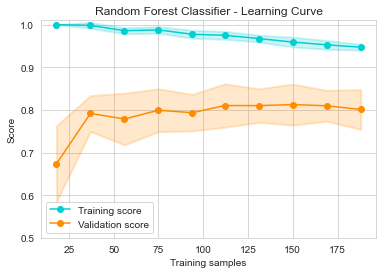

In [493]:
class_model = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
pt = plot_learning_curve('Random Forest Classifier', class_model, train_prep.values, y_train_binary);
pt.set_ylim([0.5, 1.01]);

We now make predictions based on unseen data:

In [494]:
predict= RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=6).fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In this case, much better results are obtained compared to the previous decision tree model. As observed, a recall of 93% is achieved in the positive cases, which is quite high! This is great news as that means that 93% of patients with a heart disease as identified as such. Moreover, values above 0.8 are obtained both the recall and precision for negative and positive cases respectively. This scores results in F1-score of 0.9 as observed.

## 4.1.4. Logistic Regression <a class="anchor" id="chapter_4_1_4"></a>

We now continue with testing the logistic regression technique, which is based on a sigmoid function for classification. In this case, we look at the influence of C parameter in the accuracy of results, which represents the inverse of regularization strength. Keep in mind that regularization is an important step in order to minimize the risk of over-fitting. More information about how this model works can be found [here](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python).

Logistic Regression Classifier: C parameter variation.
The maximum mean score achieved in validation set is 83.3% with C=0.1


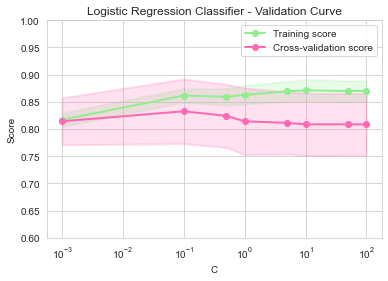

In [495]:
C_list= [0.001, 0.1, 0.5, 1 , 5, 10, 50, 100]

class_model = LogisticRegression(max_iter = 5000, multi_class='auto', class_weight='balanced')
pt = plot_val_curve('Logistic Regression Classifier', 'C', C_list, get_train_test_scores, train_prep, y_train_binary, class_model);
pt.set_ylim([0.6, 1.0]);

F1-scores above 0.8 are achieved in both the validation and training set. The regularization parameter seems to provide the best scores in the validation data when C=0.1. Let's now look at the learning curves:

The maximum mean score achieved in validation set is 83.3%


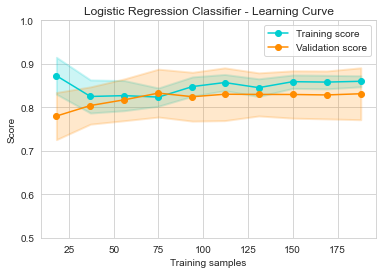

In [496]:
class_model = LogisticRegression(C=0.1, multi_class='auto', class_weight='balanced')
pt = plot_learning_curve('Logistic Regression Classifier', class_model, train_prep, y_train_binary);
pt.set_ylim([0.5, 1.0]);

As observed in the learning curves above, both training and validation curves quickly converge to a stable value above 0.8. This means that our model presents great performance in terms of over-fitting and under-fitting.

Next step now is to make predictions considering new datapoints and then check the evaluation metrics:

In [497]:
predict= LogisticRegression(C= 0.1, class_weight='balanced', multi_class='auto').fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



Overall good results are obtained, with F1-score near to 0.9. In particular, very satisfactory results of recall in the positive cases are achieved, being identified 93% of the positive heart diseases.

## 4.1.5. Support Vector Machines (SVM) <a class="anchor" id="chapter_4_1_5"></a>

### SVM - RBF kernel

We continue with SVM model based on the radial basis function (RBF) kernel. The latter uses a nonlinear approach and a high-dimensional feature space mapping of the input to find an optimal hyperplane with the largest amount of margin, which then allows to define boundaries between classes. In this case, we are going to look at the C parameter as well as the kernel coefficient gamma. More information about how this model works can be found [here](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python). 

SVC RBF: C parameter variation.
The maximum mean score achieved in validation set is 81.7% with C=0.5


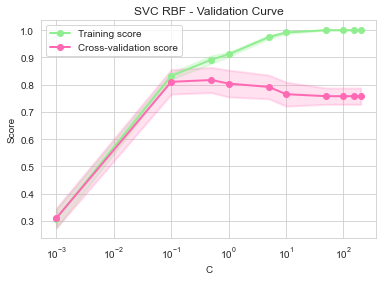

In [498]:
C_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='rbf', class_weight='balanced')
plot_val_curve('SVC RBF', 'C', C_list, get_train_test_scores, train_prep, y_train_binary, class_model);

SVC RBF: gamma parameter variation.
The maximum mean score achieved in validation set is 81.6% with gamma=0.1


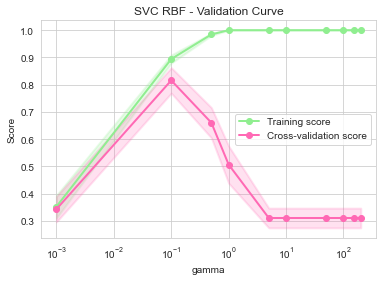

In [499]:
g_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='rbf', C=0.5, class_weight='balanced')
plot_val_curve('SVC RBF', 'gamma', g_list, get_train_test_scores, train_prep, y_train_binary, class_model);

As observed, the best F1-scores above 0.8 are obtained with parameters C=0.5 and gamma=0.1. Let's now look at the learning curves:

The maximum mean score achieved in validation set is 82.3%


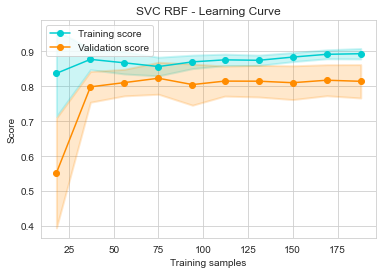

In [500]:
class_model = svm.SVC(kernel='rbf', C=0.5, gamma=0.1, class_weight='balanced')
plot_learning_curve('SVC RBF',class_model, train_prep, y_train_binary);

Satisfactory performance of our model in terms of over-fitting and under-fitting is seen based on the learning curves. Both training and validation curves rapidly converge to a score value above 0.8. 

We now continue with the predictions on new data and the resulting evaluation metrics:

In [501]:
predict = svm.SVC(kernel='rbf', C=0.5, gamma=0.1, class_weight='balanced').fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



As observed, very good scores are obtained! Overall, all values are close to 0.9, with 0.93 as recall score in the positive cases and F1-score of 0.9!

### SVM - Polynomial kernel

We now look at SVM classifier with polynomial kernel. Here, an additional determinant parameter to define is the polynomial degree plus the gamma and C parameters:

SVC Polynomial: degree parameter variation.
The maximum mean score achieved in validation set is 81.1% with degree=2


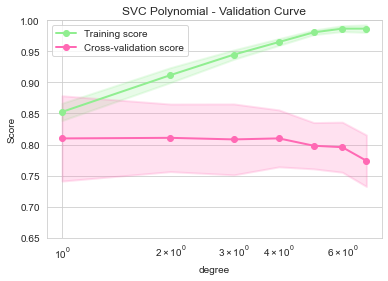

In [502]:
d_list= [1, 2, 3, 4, 5, 6, 7]

class_model = svm.SVC(kernel='poly', class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'degree', d_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.65, 1.0]);

SVC Polynomial: C parameter variation.
The maximum mean score achieved in validation set is 81.9% with C=0.1


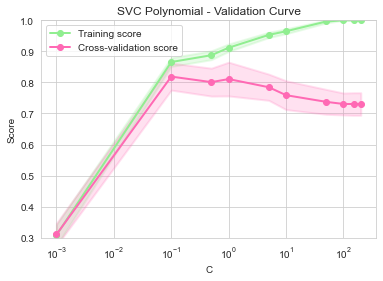

In [503]:
C_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='poly', degree=2, class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'C', C_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.3, 1.0]);

SVC Polynomial: gamma parameter variation.
The maximum mean score achieved in validation set is 82.0% with gamma=0.1


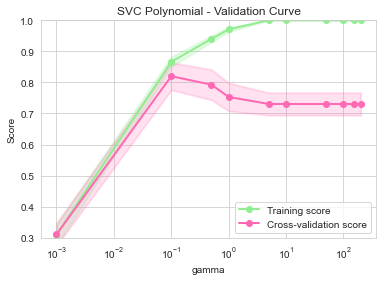

In [504]:
g_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='poly', degree=2, C=0.1, class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'gamma', g_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.3, 1.0]);

The best F1-score results are obtained for C=0.1, gamma=0.1 and degree=2. Nonetheless, the polynomial degree did not seem to have a strong effect on the performance, resulting in similar validation scores until a point where they start to decrease at high degrees. If we look at the learning curve below, we can see that convergence at high values above 0.8 is achieved, thus the model shows good performance in terms of generalization.

The maximum mean score achieved in validation set is 82.0%


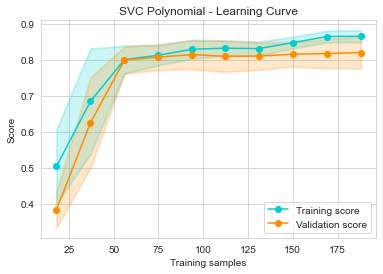

In [505]:
class_model = svm.SVC(kernel='poly', degree=2, C=0.1, gamma=0.1, class_weight='balanced')
plot_learning_curve('SVC Polynomial',class_model, train_prep, y_train_binary);

Finally, we look at the classification report obtained from the predictions made based on the test data:

In [506]:
predict = svm.SVC(kernel='rbf', degree=2, C=0.1, gamma=0.1, class_weight='balanced').fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.78      0.89      0.83        28

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



Overall, good results were obtained. However, SVM with RBF kerner provided higher scores and thus better performance.

## 4.1.6 Neural Network <a class="anchor" id="chapter_4_1_6"></a>

In this section, a neural network for predicting the heart disease diagnosis is created. In this case, we are going to use one hidden layer with 12 activation units and one two-dimensional output layer with softmax function, which transforms a vector of values to a probability distribution. Taking into account this is a binary classification problem, an output later with one binary unit and sigmoid function could also be considered. Furthermore, ReLU activation function is selected to include non-linearity. No need of either batch normalization or dropout layers was considered in this problem.

In [507]:
model = Sequential()
model.add(Dense(12, input_dim=train_prep.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

We now compile the model with Adaptive Moment Estimation (ADAM) optimizer. In this case, we aim to minimize the loss function of categorical cross entropy. In addition, we define a function to compute F1-score when running:

In [508]:
def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [509]:
# compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=f1_m)

Additionally, early stopping callback is added to the model in order to stop the training if the validation loss starts to diverge with further iterations. In this case, a minimum of 10 epochs is set before the model stops and the best weights achieved are restored.

In [510]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True) 

It should be remarked that, since the model will compute the probabilities for each class, we need the target data to have the same dimensions as number of categories are. Therefore, we need to encode our one-dimensional target array into two-dimensional for the case of binary classification:

In [511]:
y_categorical = pd.DataFrame(to_categorical(y=y_binary, num_classes=2), index= y_binary.index)

In [512]:
y_categorical.head()

0    1
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

We now split the training and target data into validation and training sets: 

In [513]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(train_prep, y_train_binary, stratify=y_train_binary, train_size=0.8, test_size=0.2, random_state=0)

We now fetch the encoded targets:

In [514]:
y_train_nn_encoded = y_categorical.iloc[y_train_nn.index]
y_valid_nn_encoded = y_categorical.iloc[y_valid_nn.index]

We still need to take into account the class imbalance, therefore we need to compute the weights that will be used by the model. In this case, the output will be an array of weights, one for each sample:

In [515]:
weights = class_weight.compute_sample_weight('balanced', y_train_nn_encoded)

In [516]:
weights[:10]

array([1.16739331, 0.86618959, 1.16739331, 0.86618959, 0.86618959,
       1.16739331, 0.86618959, 0.86618959, 1.16739331, 1.16739331])

Finally, we set the number of epochs and we run the model. Epochs value represents the number of times the model will run through the whole dataset if no early stopping occurs. In addition, we set the value of the batch size, which represents the number of samples the model need to run through in order to update the internal parameters.

In [517]:
batch_size= 12

history = model.fit(X_train_nn.values,
                    y_train_nn_encoded,
                    epochs=200, 
                    batch_size=batch_size,
                    validation_data = (X_valid_nn.values, y_valid_nn_encoded), 
                    callbacks=es, sample_weight=weights)

Epoch 1/200
 9/16 [===============>..............] - ETA: 0s - loss: 0.8526 - f1_m: 0.5185

2021-11-03 14:08:24.947313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-03 14:08:25.142635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 0.8222 - f1_m: 0.5469 - val_loss: 1.0542 - val_f1_m: 0.4375
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7267 - f1_m: 0.5938 - val_loss: 0.9433 - val_f1_m: 0.5208
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6610 - f1_m: 0.6615 - val_loss: 0.8524 - val_f1_m: 0.5208
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6115 - f1_m: 0.6901 - val_loss: 0.7787 - val_f1_m: 0.5417
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5755 - f1_m: 0.7031 - val_loss: 0.7121 - val_f1_m: 0.6042
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5437 - f1_m: 0.7005 - val_loss: 0.6642 - val_f1_m: 0.6667
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5193 - f1_m: 0.7344 - val_loss: 0.6224 - val_f1_m: 0.6667
Epoch 8/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4971 

In the figure below, we can see how the loss progressively decreases with the number of epochs until both curves converge at a low loss value. This indicates that satisfactory performance has been achieved with no high losses. In addition, the model is able to generalize its parameters, since neither over-fitting nor under-fitting are observed.

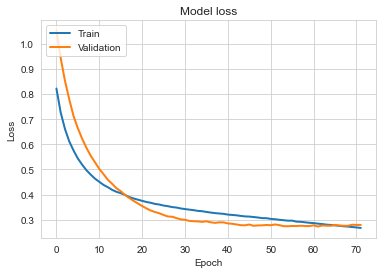

In [518]:
plt.plot(history.history['loss'], linewidth = 2.0)
plt.plot(history.history['val_loss'], linewidth = 2.0)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

If we look now at the F1-score, we can see again that good convergence of both curves is achieved at values around 0.9.

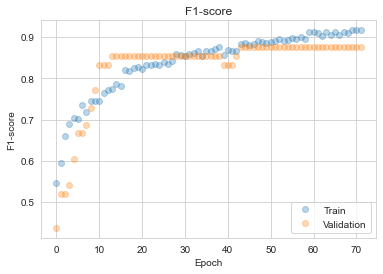

In [519]:
plt.plot(history.history['f1_m'],'o', alpha= 0.3)
plt.plot(history.history['val_f1_m'],'o', alpha= 0.3)
plt.title('F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Let's now apply our model to unseen data:

In [520]:
y_pred = model.predict(test_prep)
y_test_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_binary,y_test_class))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



2021-11-03 14:08:33.971992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Similar results to logistic regression, support vector machine (with RBF kernel) and random forest models were achieved. High recall values were obtained, meaning 93% of the positive cases could be identified. This in turn results in 0.93 of precision in the case of category 0 since we have a binary classification problem, meaning that 93% of the cases which were predicted negative did actually have negative diangosis. In addition, high precision of category 1 was also obtained, meaning 84% of the patients predicted to have a positive diagnosis did actually have that condition. Again, this means that 84% of the actual healthy patients could be identified by the model.

# 4.2. Multiclass Classification <a class="anchor" id="chapter4_2"></a>

We now aim to consider all disease categories for multiclass classification. It should be kept in mind that, based on our previous UMAP result, no good characterisation of the disease type is to be expected from our training data. Nonetheless, let's see how our models perform when all target types are included in the computations.

## 4.2.1. K Neighbors <a class="anchor" id="chapter_4_2_1"></a>

We start by looking at the k-neighbors algorithm. Previous validation curves when considering binary classification led to scores above 0.8. Looking at the figure below, we can see that much lower F1-scores were obtained this time, with maximum values of 0.5 when 5 neighbors were considered.

K Neighbors Classifier: n_neighbors parameter variation.
The maximum mean score achieved in validation set is 52.3% with n_neighbors=5


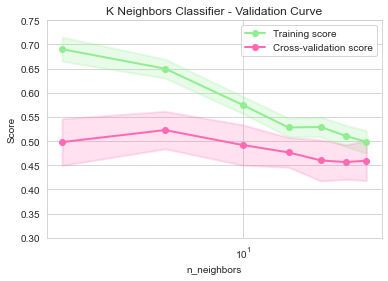

In [521]:
neighbors_list= [2, 5, 10, 15, 20, 25, 30]

class_model = KNeighborsClassifier()

pt = plot_val_curve('K Neighbors Classifier', 'n_neighbors', neighbors_list, get_train_test_scores, train_prep, y_train, class_model);
pt.set_ylim([0.3, 0.75]);

If we look at the learning curves, we can see the obtained score is also lower for both curves compared to previous results and no satisfactory convergence is observed.

The maximum mean score achieved in validation set is 51.3%


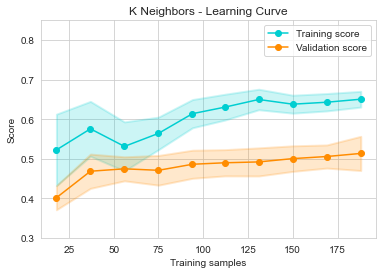

In [522]:
class_model = KNeighborsClassifier(n_neighbors = 5)
pt = plot_learning_curve('K Neighbors', class_model, train_prep.values, y_train);
pt.set_ylim([0.3, 0.85]);

Let's now make predictions based on unseen data and then compute the evaluation metrics:

In [523]:
predict = KNeighborsClassifier(n_neighbors = 5).fit(train_prep.values, y_train).predict(test_prep.values)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.46      0.55      0.50        11
           2       0.33      0.43      0.38         7
           3       1.00      0.14      0.25         7
           4       0.50      0.33      0.40         3

    accuracy                           0.65        60
   macro avg       0.62      0.47      0.47        60
weighted avg       0.69      0.65      0.63        60



Let's break down these results:

* 0-category: scores above 0.8 were obtained, which are still reasonable good results.
* 1-category: scores around 0.5 were obtained, which are not very satisfactory.
* 2-category: only 33% of the cases predicted as category 2 were actually so. Moreover, just 43% of the total true cases could be identified.
* 3-category: precision of 1, which means all the cases predicted as category 3 were actually so. Unfortunately, only 14% of the total category 3 cases were predicted. 
* 4-category: 50% of the cases predicted as category 4 were actually so. Plus, just 33% of the total cases belonging to class 4 could be identified.

## 4.2.2. Decision Tree <a class="anchor" id="chapter_4_2_2"></a>

The next classification model to test is the decision tree algorithm. Taking into account that now we have four imbalanced categories, it is interesting to see the value of the weights assigned to each class when the option of balancing is considered:

In [524]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y= y_train)
pd.Series(class_weights, index = [0, 1, 2, 3, 4], name= 'Target weights')

0    0.371654
1    1.097674
2    1.685714
3    1.685714
4    4.720000
Name: Target weights, dtype: float64

As expected, class 0 is over-represented and thus a low weight is assigned to compensate. On the other hand, class 4 is under-represented and thus a high weight of 4.7 is assigned. In this way, we prevent our models from being biased towards the most common class (category 0 in this case) by recalibrating the weights of each category.

Looking at the cross-validation and learning curves, we see again that poor results were obtained compared to previous binary classification. Furthermore, high over-fitting is observed with no improvement in the validation scores, which means the model cannot be generalized.

Decision Tree Classifier: max_depth parameter variation.
The maximum mean score achieved in validation set is 47.6% with max_depth=15


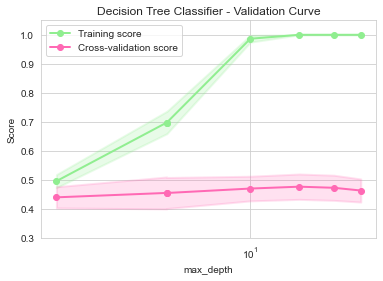

In [525]:
depth_list = [2, 5, 5, 10, 15, 20, 25]

class_model = DecisionTreeClassifier(class_weight='balanced')

pt = plot_val_curve('Decision Tree Classifier', 'max_depth', depth_list, get_train_test_scores, train_prep, y_train, class_model);
pt.set_ylim([0.3, 1.05]);

The maximum mean score achieved in validation set is 49.3%


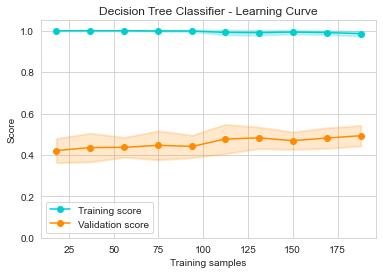

In [526]:
class_model = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
pt = plot_learning_curve('Decision Tree Classifier', class_model, train_prep.values, y_train);
pt.set_ylim([0.0, 1.05]);

We know apply the model to unseen data:

In [527]:
predict = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=1).fit(train_prep.values,y_train.values).predict(test_prep.values)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.27      0.27      0.27        11
           2       0.40      0.29      0.33         7
           3       0.38      0.71      0.50         7
           4       0.25      0.33      0.29         3

    accuracy                           0.55        60
   macro avg       0.42      0.46      0.43        60
weighted avg       0.59      0.55      0.56        60



Breaking down these results:

* 0-category: 80% of the predicted negative cases were actually negative diagnosis. Additionally, 69% of all the true negative cases were identified as such.
* 1-category: poor scores were obtained. Only 27% of the predicted cases really belonged to this class, and only 27% of the samples truly belonging to category 1 were identified.
* 2-category: only 40% of the cases predicted as category 2 were actually so. Moreover, just 29% of the total true cases could be identified.
* 3-category: just 38% of the casess predicted as category 3 were actually so. Additionally, 71% of the total cases truly belonging to category 3 were predicted. 
* 4-category: 25% of the cases predicted as category 4 were actually so. Plus, just 33% of the total cases belonging to class 4 could be identified.

## 4.2.3. Random Forest <a class="anchor" id="chapter_4_2_3"></a>

Random forest classifier did previously provide good results at F1 scores close to 0.9. Unfortunaly, when applying this model to the current multiclass classification we see again that poor performance is obtained, with F1 values around 0.5, which is nearly half of the previous scores. Furthermore, over-fitting is observed again with barely no variation in the low validation scores, which means the model is not able to improve in terms of generalization.

Random Forest Classifier: n_estimators parameter variation.
The maximum mean score achieved in validation set is 52.4% with n_estimators=10


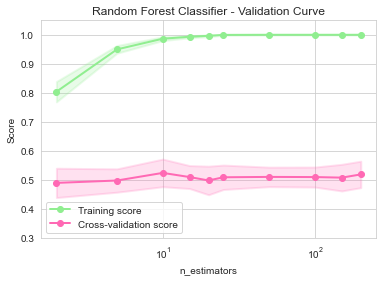

In [543]:
n_estimators = [2, 5, 10, 15, 20, 25, 50, 100, 150, 200]
class_model = RandomForestClassifier(class_weight='balanced')
pt = plot_val_curve('Random Forest Classifier', 'n_estimators', n_estimators, get_train_test_scores, train_prep, y_train, class_model);
pt.set_ylim([0.3, 1.05]);

The maximum mean score achieved in validation set is 52.4%


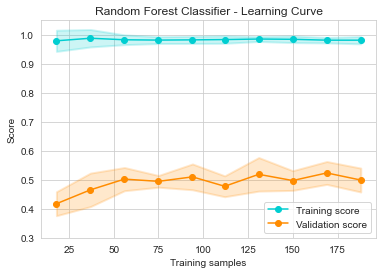

In [544]:
class_model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
pt = plot_learning_curve('Random Forest Classifier', class_model, train_prep.values, y_train);
pt.set_ylim([0.3, 1.05]);

Let's now see how the model performs when making predictions:

In [552]:
predict= RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=1).fit(train_prep.values,y_train.values).predict(test_prep.values)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        32
           1       0.29      0.18      0.22        11
           2       1.00      0.29      0.44         7
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.44      0.32      0.33        60
weighted avg       0.57      0.60      0.55        60



Breaking down these results:

* 0-category: 72% of the predicted negative cases were actually negative diagnosis. Additionally, 97% of all the true negative cases were identified as such.
* 1-category: only 29% of the predicted cases really belonged to this class, and only 18% of the samples truly belonging to category 1 were identified.
* 2-category: all the cases predicted as category 2 were actually so. Unfortunatelly, only 29% of the total true cases could be identified.
* 3-category: just 20% of the casess predicted as category 3 were actually so. Additionally, 14% of the total cases truly belonging to category 3 were predicted. 
* 4-category: precision and recall of 0, meaning that this category could not be predicted at all. 

## 4.2.4. Logistic Regression <a class="anchor" id="chapter_4_2_4"></a>

Logistic regression was also one of the models that previously showed good performance. However, we can see the same behaviour as we have been just seing with other models when considering a multiclass target. If we look at the cross-validation results, validation scores around 0.5 and training scores below 0.8 were obtained. The maximum validation score achieved was 0.52 with C=1, whereas we previously achieved 0.83. Furthermore, we do not see any substantial effect of changing the regularization parameter on the validation set. If we now look at the learning curves, we can see that no convegence is achieved for the existing number of samples plus both curves approach low score values, which is not desired. This overall shows that no satisfactory performance was achieved. 

Logistic Regression Classifier: C parameter variation.
The maximum mean score achieved in validation set is 52.7% with C=1


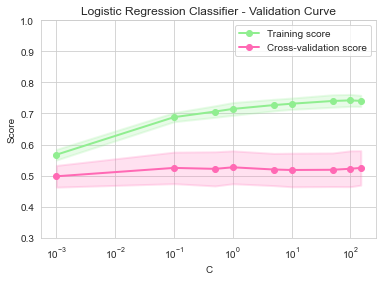

In [531]:
C_list= [0.001, 0.1, 0.5, 1 , 5, 10, 50, 100, 150]

class_model = LogisticRegression(max_iter=5000, multi_class='auto', class_weight='balanced')
pt = plot_val_curve('Logistic Regression Classifier', 'C', C_list, get_train_test_scores, train_prep, y_train, class_model);
pt.set_ylim([0.3, 1.0]);

The maximum mean score achieved in validation set is 53.5%


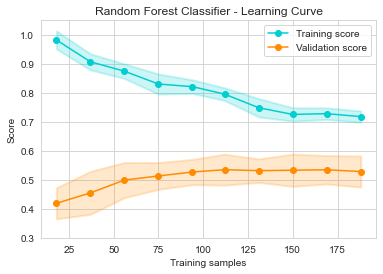

In [532]:
class_model = LogisticRegression(max_iter=5000, C=1, multi_class='auto', class_weight='balanced')
pt = plot_learning_curve('Random Forest Classifier', class_model, train_prep.values, y_train);
pt.set_ylim([0.3, 1.05]);

Let's see the resulting evaluation metrics when applied to unseen data:

In [533]:
predict= LogisticRegression(max_iter=5000, C=1, multi_class='auto', class_weight='balanced').fit(train_prep.values,y_train.values).predict(test_prep.values)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.50      0.64      0.56        11
           2       0.33      0.43      0.38         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.37      0.38      0.37        60
weighted avg       0.66      0.60      0.62        60



Breaking down these results:

* 0-category: overall good results, 100% of the predicted negative cases were actually negative diagnosis. Additionally, 81% of all the true negative cases were identified as such.
* 1-category: only 50% of the predicted cases really belonged to this class, plus 64% of the samples truly belonging to category 1 were identified.
* 2-category: just 33% of the cases predicted as category 2 were actually so. Moreover, just 43% of the total true cases could be identified.
* 3 and 4 categories: precision and recall of 0, meaning that these categories could not be predicted at all. 

## 4.2.5. Neural Network <a class="anchor" id="chapter_4_2_5"></a>

Let's now look at the performance of neural networks. The output layer will now have five units:

In [534]:
model = Sequential()
model.add(Dense(12, input_dim=train_prep.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=f1_m)

We encode again our target variable. This time, our new target will have five-dimensions according to the total number of diagnosis categories.

In [535]:
y_categorical = pd.DataFrame(to_categorical(y=y, num_classes=5), index= y.index)

y_train_cat = y_categorical.iloc[y_train.index,:]
y_test_cat = y_categorical.iloc[y_test.index,:]

In [536]:
y_categorical.head()

0    1    2    3    4
0  0.0  0.0  1.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0

The data is now further splitted for training and validation and the weights are computed:

In [537]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(train_prep, y_train, stratify=y_train, train_size=0.8, test_size=0.2, random_state=0)

In [538]:
y_train_nn_encoded = y_categorical.iloc[y_train_nn.index]
y_valid_nn_encoded = y_categorical.iloc[y_valid_nn.index]

weights = class_weight.compute_sample_weight('balanced', y_train_nn_encoded)

We finally run the model:

In [539]:
batch_size=12

history = model.fit(X_train_nn.values,
                    y_train_nn_encoded,
                    epochs=200, 
                    batch_size=batch_size,
                    validation_data = (X_valid_nn.values, y_valid_nn_encoded), callbacks=es, sample_weight=weights)

Epoch 1/200
10/16 [=================>............] - ETA: 0s - loss: 0.8472 - f1_m: 0.0143    

2021-11-03 14:08:53.900113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-03 14:08:54.085295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 0.7836 - f1_m: 0.0089 - val_loss: 1.9051 - val_f1_m: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7559 - f1_m: 0.0089 - val_loss: 1.8578 - val_f1_m: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7346 - f1_m: 0.0096 - val_loss: 1.8172 - val_f1_m: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7187 - f1_m: 0.0096 - val_loss: 1.7815 - val_f1_m: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7020 - f1_m: 0.0096 - val_loss: 1.7500 - val_f1_m: 0.0000e+00
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6884 - f1_m: 0.0096 - val_loss: 1.7230 - val_f1_m: 0.0000e+00
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6742 - f1_m: 0.0192 - val_loss: 1.6949 - val_f1_m: 0.0000e+00
Epoch 8/200
16/16 [==============================] -

In this case, we observe that both the training and validation loss decrease as the number of epochs increase. However, the curves do not converge and a gap remains between their losses. Furthermore, the training loss is observed to be much lower than the validation loss. This issue occurs because the model is dealing with an underrepresentative train dataset. The latter means that the training data does not provide sufficient information and thus the model is not able to capture the statistical characteristics relative to the validation set.

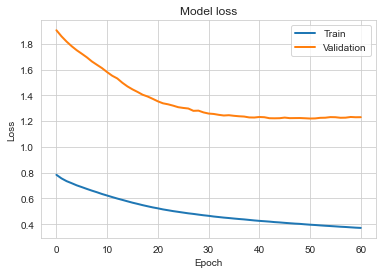

In [540]:
plt.plot(history.history['loss'], linewidth = 2.0)
plt.plot(history.history['val_loss'], linewidth = 2.0)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

If we look at the F1-scores, we can see that low values around 0.5 were also obtained:

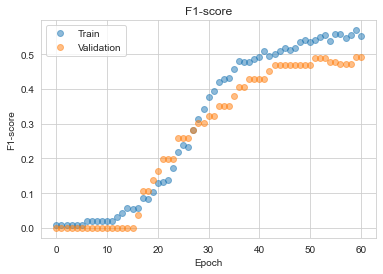

In [541]:
plt.plot(history.history['f1_m'], 'o', alpha= 0.5)
plt.plot(history.history['val_f1_m'], 'o', alpha=0.5)
plt.title('F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Let's now see how it performs when applied to unseen data:

In [542]:
y_pred = model.predict(test_prep)
y_test_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test,y_test_class))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.23      0.45      0.30        11
           2       0.33      0.29      0.31         7
           3       0.22      0.29      0.25         7
           4       0.25      0.33      0.29         3

    accuracy                           0.48        60
   macro avg       0.41      0.39      0.38        60
weighted avg       0.65      0.48      0.53        60



2021-11-03 14:09:01.249376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Breaking down these results:

* 0-category: all the predicted negative cases truly corresponded to negative diagnosis. Unfortunately, just 59% of all the true negative cases were identified as such.
* 1-category: only 23% of the predicted cases really belonged to this class, and 45% of the samples truly belonging to category 1 were identified.
* 2-category: 33% the cases predicted as category 2 were actually so. Moreover, only 29% of the total true cases could be identified.
* 3-category: just 22% of the casess predicted as category 3 were actually so. Additionally, 29% of the total cases truly belonging to category 3 were predicted. 
* 4-category: just 25% of the cases which were predicted as category 4 did actually have this class. Furthermore, only 33% of the total cases truly belonging to the 4th category could be identified.

# 5. Conclusion <a class="anchor" id="chapter5"></a>

To sum up, binary predictions of positive and negative heart disease diagnosis could be satisfactory achieved based on the provided patients' attributes. Unfortunately, no proper identification of the disease level could be done due to the under-representative nature of the provided data for multiclass classification. Thus, adding more informative features could lead to better characterisation of the positive cases, which would allow to make more reliable predictions of the heart disease diagnosis.